In [1]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv(r"C:file.csv")
df

Company Name Ticker Symbol Country of Exchange  \
0                   Covestro AG          1COV             Germany   
1                   Covestro AG          1COV             Germany   
2                   Covestro AG          1COV             Germany   
3                   Covestro AG          1COV             Germany   
4                   Covestro AG          1COV             Germany   
...                         ...           ...                 ...   
6291  Zurich Insurance Group AG          ZURN         Switzerland   
6292  Zurich Insurance Group AG          ZURN         Switzerland   
6293  Zurich Insurance Group AG          ZURN         Switzerland   
6294  Zurich Insurance Group AG          ZURN         Switzerland   
6295  Zurich Insurance Group AG          ZURN         Switzerland   

                         NAICS National Industry Name  Year    EPS   ROA  \
0           Plastics Material and Resin Manufacturing  2016   2.93   5.1   
1           Plastics Material and Resin Manufacturing  2017   4.17   7.7   
2           Plastics Material and Resin Manufacturing  2018  12.25  18.6   
3           Plastics Material and Resin Manufacturing  2019  10.74  16.3   
4           Plastics Material and Resin Manufacturing  2020   3.26   4.9   
...                                               ...   ...    ...   ...   
6291  Direct Property and Casualty Insurance Carriers  2019  24.28   0.9   
6292  Direct Property and Casualty Insurance Carriers  2020  27.69   1.0   
6293  Direct Property and Casualty Insurance Carriers  2021  25.56   0.9   
6294  Direct Property and Casualty Insurance Carriers  2022  34.66   1.2   
6295  Direct Property and Casualty Insurance Carriers  2023  30.77   1.1   

       ROE  ESG_score  Env_score  Soc_score  Gov_score  ESG_Comb_score  \
0     20.1      66.40      70.25      68.00      56.88           66.40   
1     20.4      68.66      68.28      74.58      59.31           68.66   
2     42.2      73.62      72.78      74.72      73.21           73.62   
3     34.2      74.58      69.59      71.77      88.15           74.58   
4     10.5      76.25      74.38      69.86      90.37           76.25   
...    ...        ...        ...        ...        ...             ...   
6291  13.1      89.93      90.84      91.69      86.64           79.96   
6292  12.7      88.87      89.60      90.93      85.50           50.53   
6293  10.5      89.19      86.31      87.95      97.03           76.17   
6294  13.7      87.89      85.62      87.16      94.72           78.62   
6295  14.3      86.15      84.72      85.05      92.90           58.50   

         MarketCap  
0     1.387610e+10  
1     2.089835e+10  
2     9.062689e+09  
3     8.503184e+09  
4     1.191101e+10  
...            ...  
6291  6.138598e+10  
6292  6.349212e+10  
6293  6.604281e+10  
6294  7.199106e+10  
6295  7.645632e+10  

[6296 rows x 14 columns]

# Add Market Capitalization category column

In [7]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)

In [9]:
df

Company Name Ticker Symbol Country of Exchange  \
0                   Covestro AG          1COV             Germany   
1                   Covestro AG          1COV             Germany   
2                   Covestro AG          1COV             Germany   
3                   Covestro AG          1COV             Germany   
4                   Covestro AG          1COV             Germany   
...                         ...           ...                 ...   
6291  Zurich Insurance Group AG          ZURN         Switzerland   
6292  Zurich Insurance Group AG          ZURN         Switzerland   
6293  Zurich Insurance Group AG          ZURN         Switzerland   
6294  Zurich Insurance Group AG          ZURN         Switzerland   
6295  Zurich Insurance Group AG          ZURN         Switzerland   

                         NAICS National Industry Name  Year    EPS   ROA  \
0           Plastics Material and Resin Manufacturing  2016   2.93   5.1   
1           Plastics Material and Resin Manufacturing  2017   4.17   7.7   
2           Plastics Material and Resin Manufacturing  2018  12.25  18.6   
3           Plastics Material and Resin Manufacturing  2019  10.74  16.3   
4           Plastics Material and Resin Manufacturing  2020   3.26   4.9   
...                                               ...   ...    ...   ...   
6291  Direct Property and Casualty Insurance Carriers  2019  24.28   0.9   
6292  Direct Property and Casualty Insurance Carriers  2020  27.69   1.0   
6293  Direct Property and Casualty Insurance Carriers  2021  25.56   0.9   
6294  Direct Property and Casualty Insurance Carriers  2022  34.66   1.2   
6295  Direct Property and Casualty Insurance Carriers  2023  30.77   1.1   

       ROE  ESG_score  Env_score  Soc_score  Gov_score  ESG_Comb_score  \
0     20.1      66.40      70.25      68.00      56.88           66.40   
1     20.4      68.66      68.28      74.58      59.31           68.66   
2     42.2      73.62      72.78      74.72      73.21           73.62   
3     34.2      74.58      69.59      71.77      88.15           74.58   
4     10.5      76.25      74.38      69.86      90.37           76.25   
...    ...        ...        ...        ...        ...             ...   
6291  13.1      89.93      90.84      91.69      86.64           79.96   
6292  12.7      88.87      89.60      90.93      85.50           50.53   
6293  10.5      89.19      86.31      87.95      97.03           76.17   
6294  13.7      87.89      85.62      87.16      94.72           78.62   
6295  14.3      86.15      84.72      85.05      92.90           58.50   

         MarketCap Market Capitalization Category  
0     1.387610e+10                      Large Cap  
1     2.089835e+10                      Large Cap  
2     9.062689e+09                        Mid Cap  
3     8.503184e+09                        Mid Cap  
4     1.191101e+10                      Large Cap  
...            ...                            ...  
6291  6.138598e+10                      Large Cap  
6292  6.349212e+10                      Large Cap  
6293  6.604281e+10                      Large Cap  
6294  7.199106e+10                      Large Cap  
6295  7.645632e+10                      Large Cap  

[6296 rows x 15 columns]

# Multicolinearity check

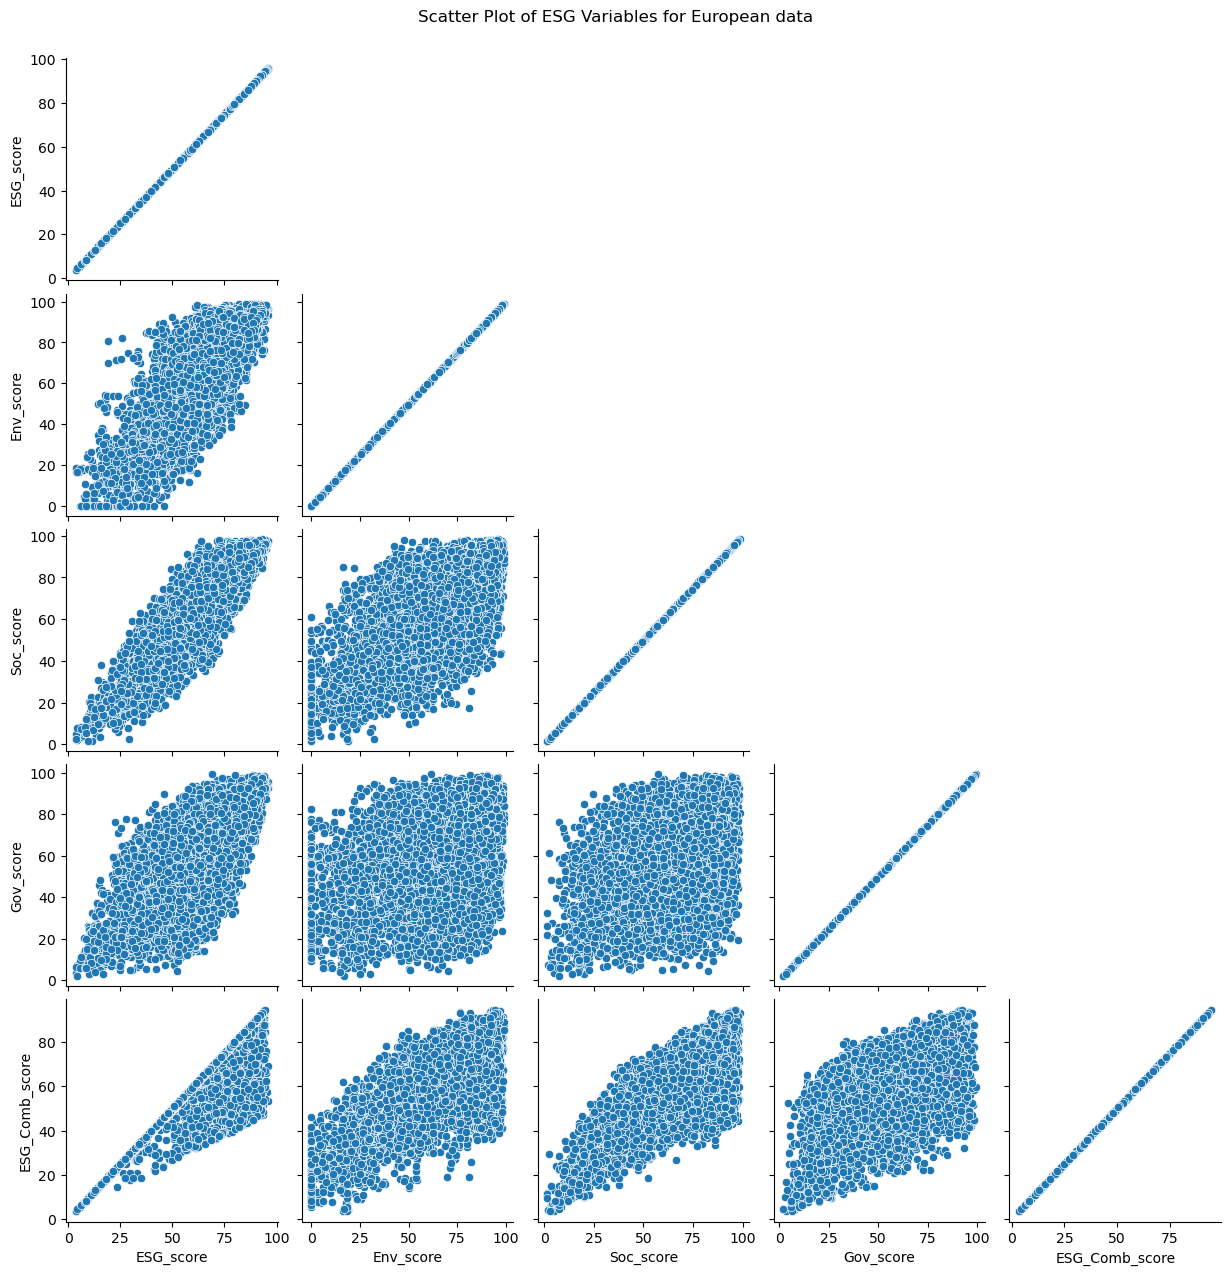

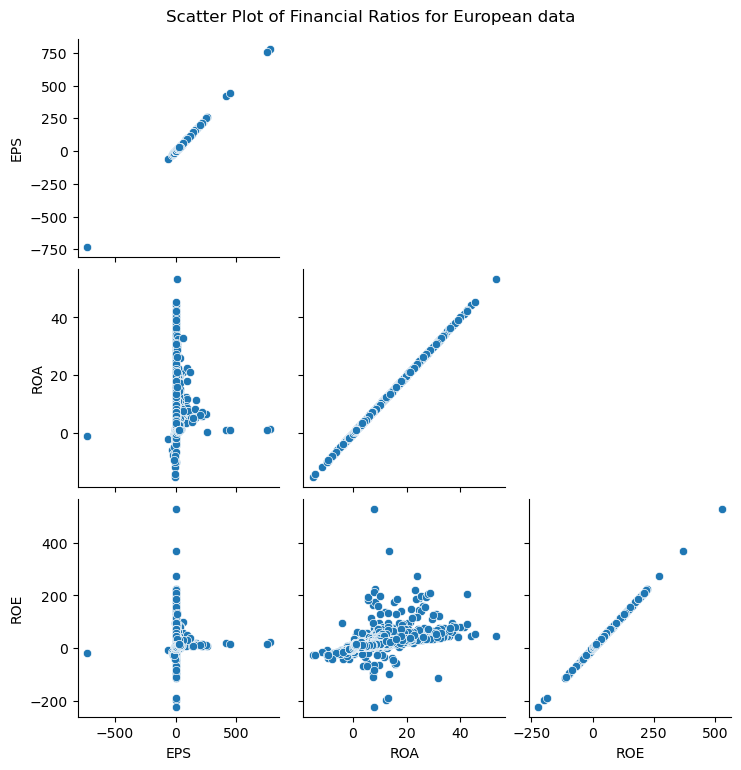

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
fin_vars = ['EPS', 'ROA', 'ROE']

# Pairplot for ESG variables without histograms
sns.pairplot(df[esg_vars], corner=True, diag_kind=None)
plt.suptitle("Scatter Plot of ESG Variables for European data", y=1.02)
plt.show()

# Pairplot for financial variables without histograms
sns.pairplot(df[fin_vars], corner=True, diag_kind=None)
plt.suptitle("Scatter Plot of Financial Ratios for European data", y=1.02)
plt.show()


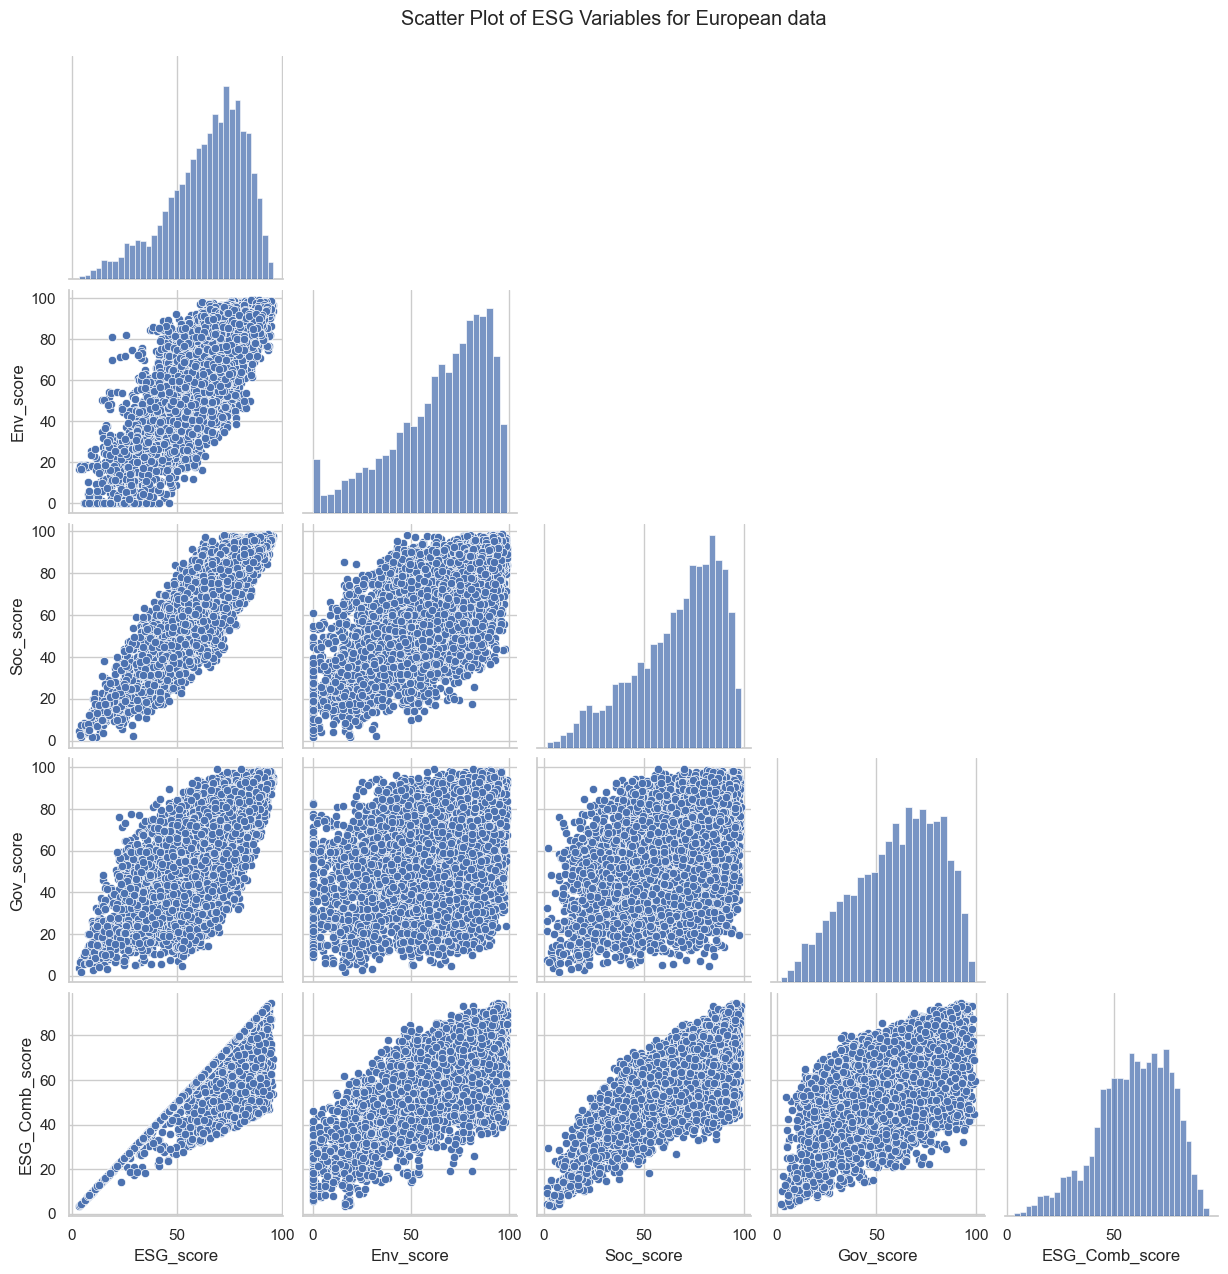

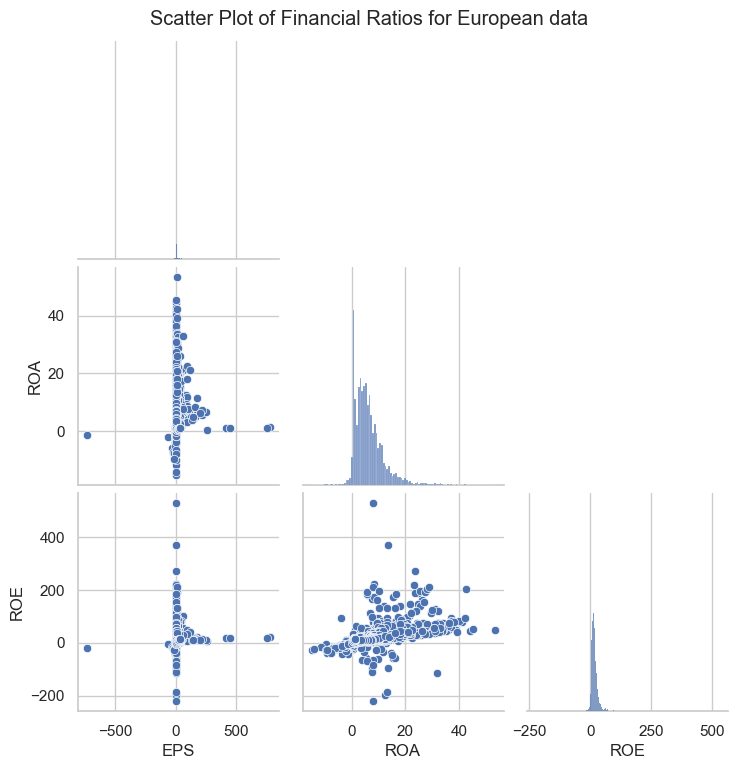

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
fin_vars = ['EPS', 'ROA', 'ROE']

sns.pairplot(df[esg_vars], corner=True)
plt.suptitle("Scatter Plot of ESG Variables for European data", y=1.02)
# g.fig.savefig("scatter_matrix_ESG_EU_final.pdf")
plt.show()
plt.show()

sns.pairplot(df[fin_vars], corner=True)
plt.suptitle("Scatter Plot of Financial Ratios for European data", y=1.02)
# g.fig.savefig("scatter_matrix_Financial_EU_final.pdf")
plt.show()
plt.show()

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your ESG and Financial variables
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
fin_vars = ['EPS', 'ROA', 'ROE']

# ESG scatter plot (lower triangle only)
g_esg = sns.pairplot(df[esg_vars], corner=True)
g_esg.fig.suptitle("Scatter Plot of ESG Variables for European Data", y=1.02)
g_esg.fig.savefig("scatter_matrix_ESG_EU_final.pdf")
plt.close(g_esg.fig)  # Close to avoid overlap with next plot

# Financial ratios scatter plot (lower triangle only)
g_fin = sns.pairplot(df[fin_vars], corner=True)
g_fin.fig.suptitle("Scatter Plot of Financial Ratios for European Data", y=1.02)
g_fin.fig.savefig("scatter_matrix_Financial_EU_final.pdf")
plt.close(g_fin.fig)


Two relatively simple tools for measuring multicollinearity are a scatter plot and correlation matrix of independent variables. When using a scatter plot, one plots independent variable values for each data point against one another. If the scatter plot reveals a linear correlation between the chosen variables, then some degree of multicollinearity may be present.

https://www.ibm.com/think/topics/multicollinearity#:~:text=Multicollinearity%20denotes%20when%20independent%20variables,can%20detect%20and%20fix%20multicollinearity.

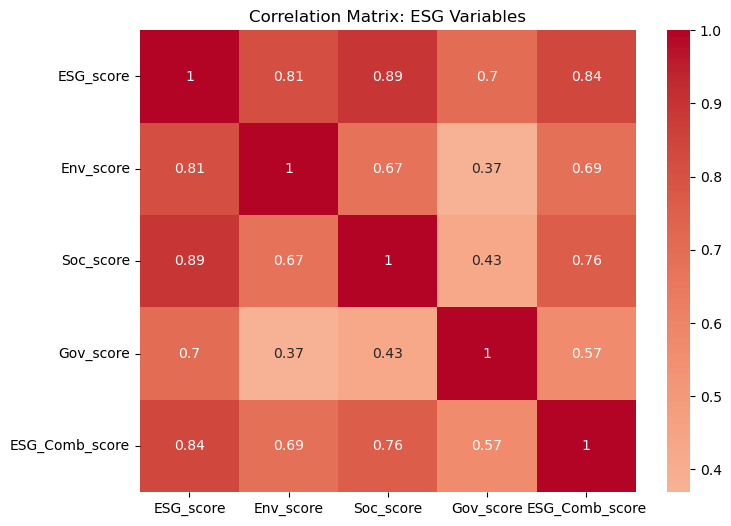

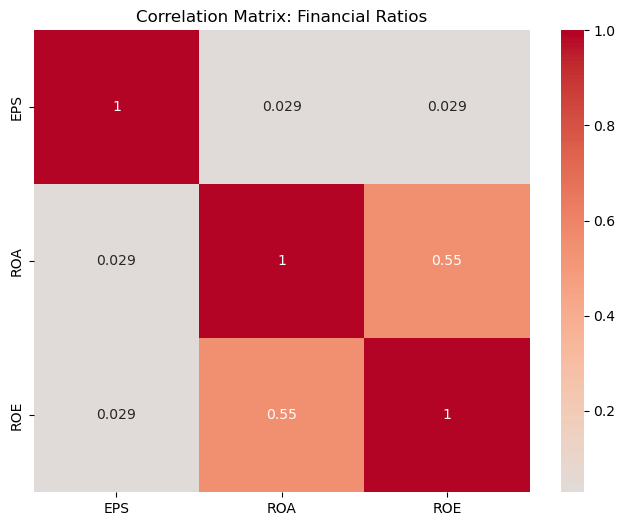

In [14]:
# --- Correlation matrix ---
def plot_corr_matrix(variables, title):
    corr = df[variables].dropna().corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title(title)
    plt.show()

plot_corr_matrix(esg_vars, "Correlation Matrix: ESG Variables")
plot_corr_matrix(fin_vars, "Correlation Matrix: Financial Ratios")

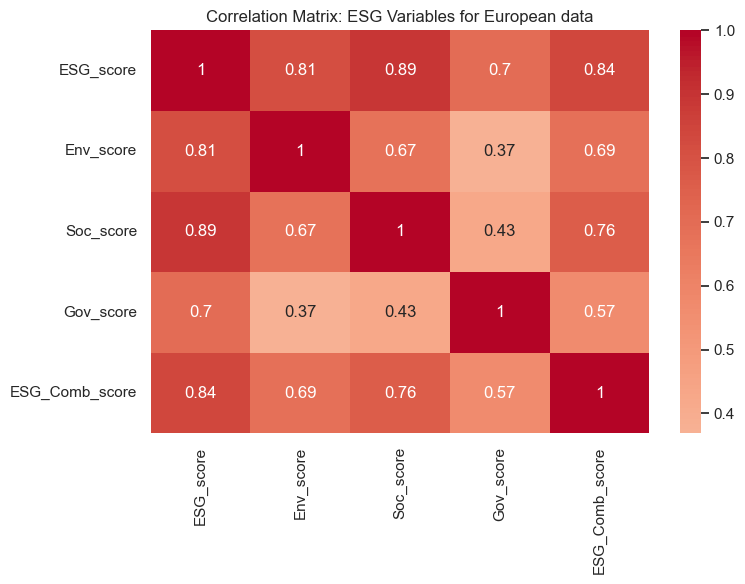

In [66]:
# --- Correlation matrix ---
def plot_corr_matrix(variables, title, filename):
    corr = df[variables].dropna().corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)  # Save the figure
    plt.show()

# Save the ESG correlation matrix
plot_corr_matrix(esg_vars, "Correlation Matrix: ESG Variables for European data", "correlation_matrix_ESG_EU.pdf")


In [64]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ESG variables
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
df_esg = df[esg_vars].dropna()
X_scaled = StandardScaler().fit_transform(df_esg)
X_df = pd.DataFrame(X_scaled, columns=esg_vars)

vif_data = []

for i, var in enumerate(esg_vars):
    X_other = X_df.drop(columns=var)
    y_target = X_df[var]

    reg = LinearRegression().fit(X_other, y_target)
    r_squared = reg.score(X_other, y_target)
    vif = 1 / (1 - r_squared) if r_squared < 1 else float("inf")

    vif_data.append({
        'Feature': var,
        'R_squared': round(r_squared, 4),
        'VIF': round(vif, 2)
    })

vif_esg_df = pd.DataFrame(vif_data)
print("VIF and R² for ESG Variables:")
print(vif_esg_df)

VIF and R² for ESG Variables:
          Feature  R_squared    VIF
0       ESG_score     0.9840  62.65
1       Env_score     0.8839   8.61
2       Soc_score     0.9426  17.43
3       Gov_score     0.8873   8.87
4  ESG_Comb_score     0.7086   3.43


In [58]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ESG variables
esg_vars = ['EPS', 'ROA', 'ROE']
df_esg = df[esg_vars].dropna()
X_scaled = StandardScaler().fit_transform(df_esg)
X_df = pd.DataFrame(X_scaled, columns=esg_vars)

vif_data = []

for i, var in enumerate(esg_vars):
    X_other = X_df.drop(columns=var)
    y_target = X_df[var]

    reg = LinearRegression().fit(X_other, y_target)
    r_squared = reg.score(X_other, y_target)
    vif = 1 / (1 - r_squared) if r_squared < 1 else float("inf")

    vif_data.append({
        'Feature': var,
        'R_squared': round(r_squared, 4),
        'VIF': round(vif, 2)
    })

vif_esg_df = pd.DataFrame(vif_data)
print("VIF and R² for ESG Variables:")
print(vif_esg_df)

VIF and R² for ESG Variables:
  Feature  R_squared   VIF
0     EPS     0.0011  1.00
1     ROA     0.3016  1.43
2     ROE     0.3016  1.43


In [68]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ESG variables
esg_vars = ['Env_score', 'Soc_score', 'Gov_score']
df_esg = df[esg_vars].dropna()
X_scaled = StandardScaler().fit_transform(df_esg)
X_df = pd.DataFrame(X_scaled, columns=esg_vars)

vif_data = []

for i, var in enumerate(esg_vars):
    X_other = X_df.drop(columns=var)
    y_target = X_df[var]

    reg = LinearRegression().fit(X_other, y_target)
    r_squared = reg.score(X_other, y_target)
    vif = 1 / (1 - r_squared) if r_squared < 1 else float("inf")

    vif_data.append({
        'Feature': var,
        'R_squared': round(r_squared, 4),
        'VIF': round(vif, 2)
    })

vif_esg_df = pd.DataFrame(vif_data)
print("VIF and R² for ESG Variables:")
print(vif_esg_df)

VIF and R² for ESG Variables:
     Feature  R_squared   VIF
0  Env_score     0.4608  1.85
1  Soc_score     0.4905  1.96
2  Gov_score     0.1953  1.24


The financial ratios are not having any multicollinearity. The ESG variables has. Now use PCA? Or just use ESG_score?

The higher the VIF value, the greater degree of multicollinearity. There is no VIF cutoff value determining a “bad” or “good” model. Nevertheless, a widely repeated rule of thumb is that a VIF value greater than or equal to ten indicates severe multicollinearity.

Deze VIF klopt vgm niet, want je hebt R^2 ervoor nodig. Alleen er is nog geen regression model.

https://online.stat.psu.edu/stat462/node/180/

https://www.ibm.com/think/topics/multicollinearity#:~:text=Multicollinearity%20denotes%20when%20independent%20variables,can%20detect%20and%20fix%20multicollinearity

# Check Skewness

Skewness:
 EPS               11.968386
ROE                5.850350
ROA                1.867492
Gov_score         -0.421878
ESG_Comb_score    -0.530942
Soc_score         -0.752257
ESG_score         -0.771424
Env_score         -0.847632
dtype: float64


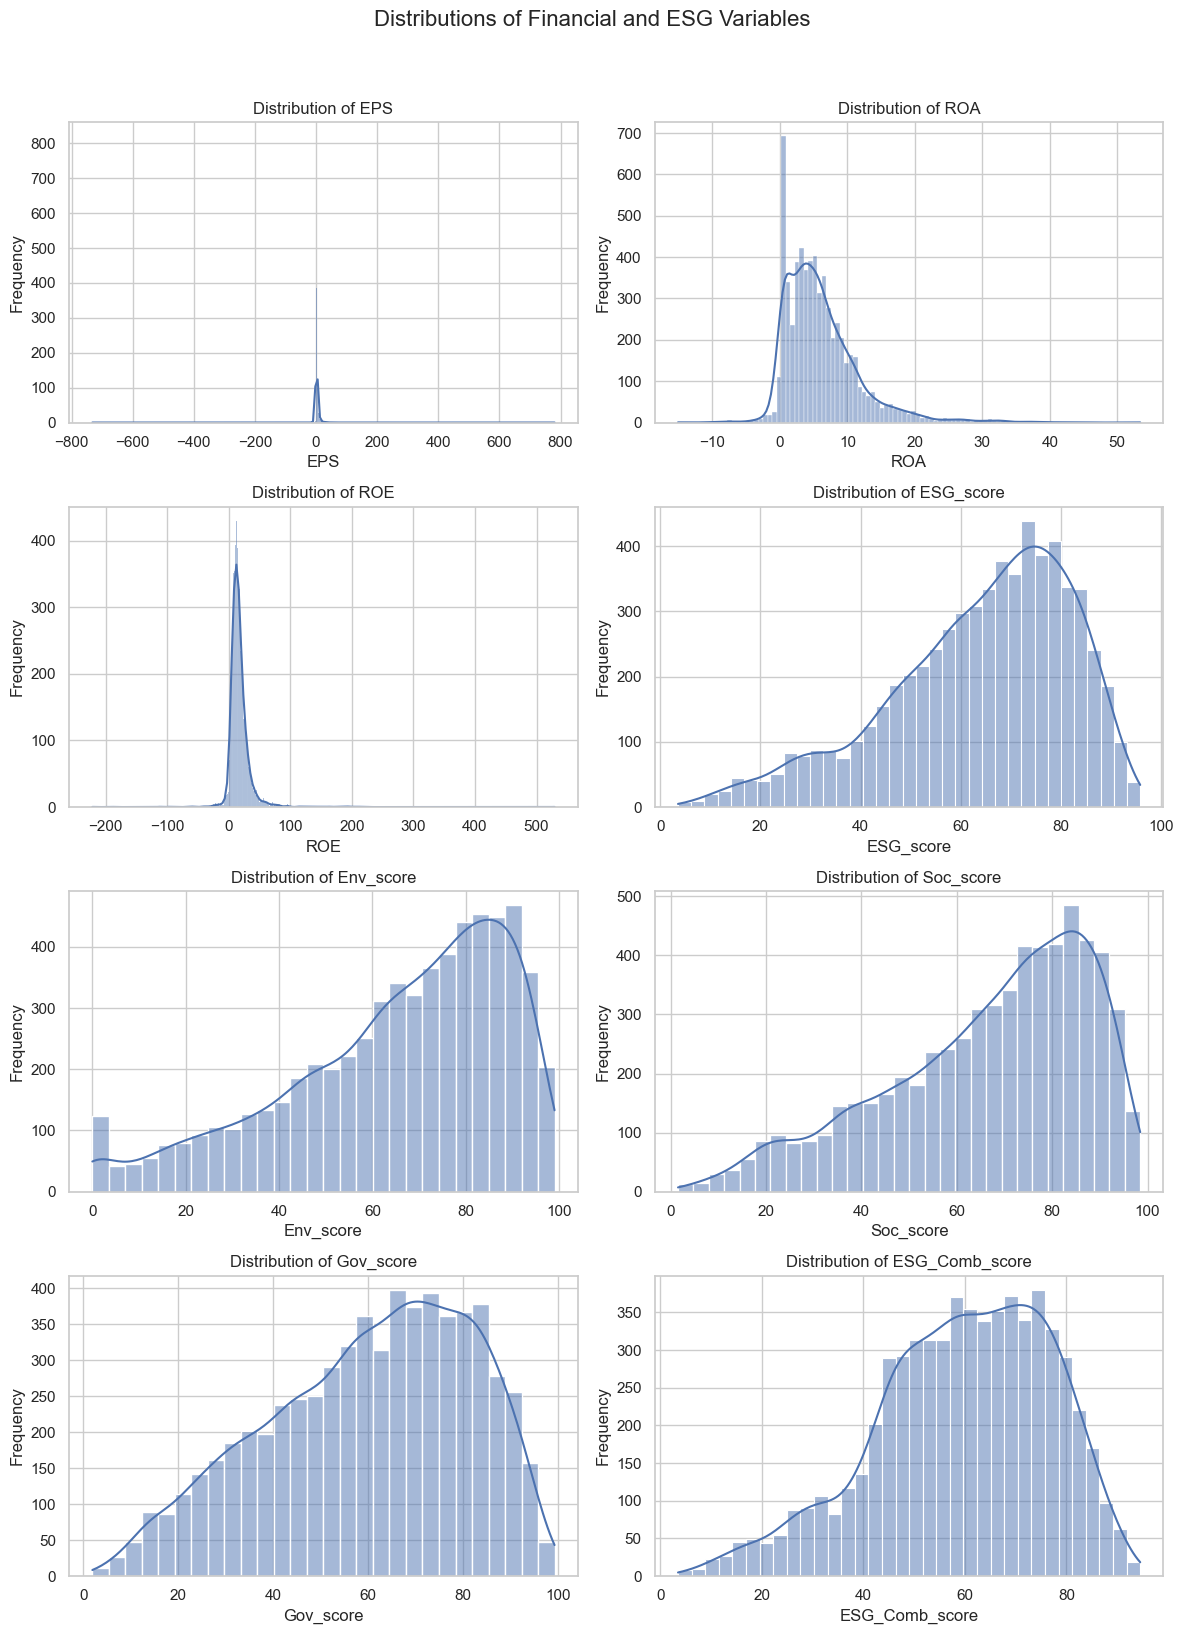

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Assuming your DataFrame is called `df`
variables_to_check = ['EPS', 'ROA', 'ROE', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# 1. Skewness values
skewness = df[variables_to_check].skew().sort_values(ascending=False)
print("Skewness:\n", skewness)

# 2. Create one figure with all histograms
n_vars = len(variables_to_check)
n_cols = 2
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, var in enumerate(variables_to_check):
    sns.histplot(df[var].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
fig.suptitle("Distributions of Financial and ESG Variables", fontsize=16, y=1.02)
plt.subplots_adjust(top=0.95)

# Save to PDF
fig.savefig("distributions_ESG_financial_vars.pdf", bbox_inches='tight')
plt.show()


# Log transforming

Minimum values before transformation:
EPS   -731.89
ROA    -15.10
ROE   -221.80
dtype: float64

First few rows of the transformed columns:
    log_EPS   log_ROA   log_ROE
0  6.600986  3.054001  5.492650
1  6.602669  3.169686  5.493884
2  6.613572  3.546740  5.579730
3  6.611544  3.478158  5.549076
4  6.601434  3.044522  5.452325


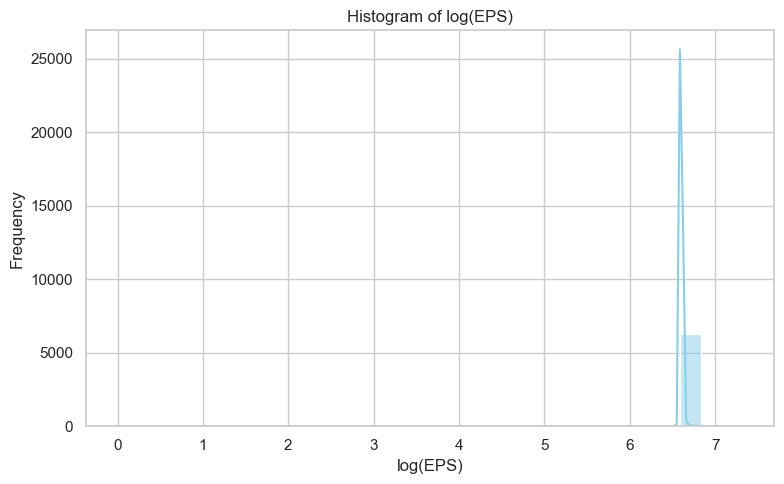

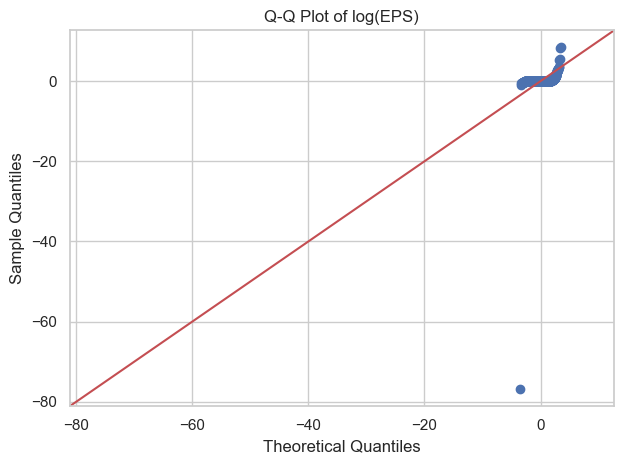

Kolmogorov–Smirnov Test for log(EPS):
  Test statistic: 0.4652620522
  p-value       : 0.0000000000
------------------------------------------------------------


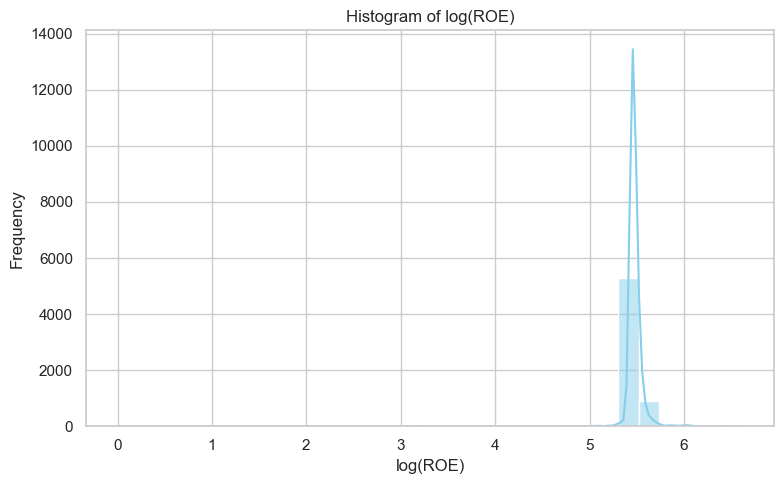

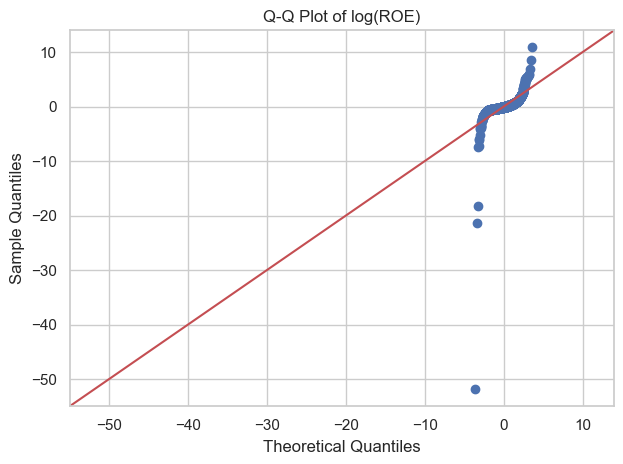

Kolmogorov–Smirnov Test for log(ROE):
  Test statistic: 0.2392952198
  p-value       : 0.0000000000
------------------------------------------------------------


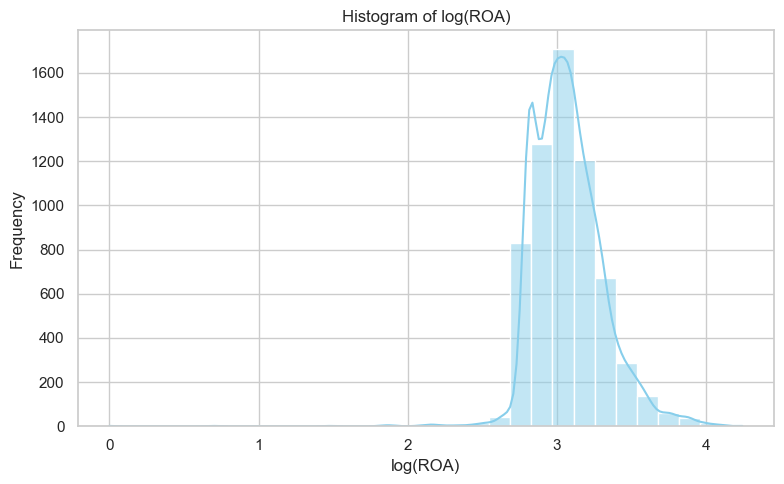

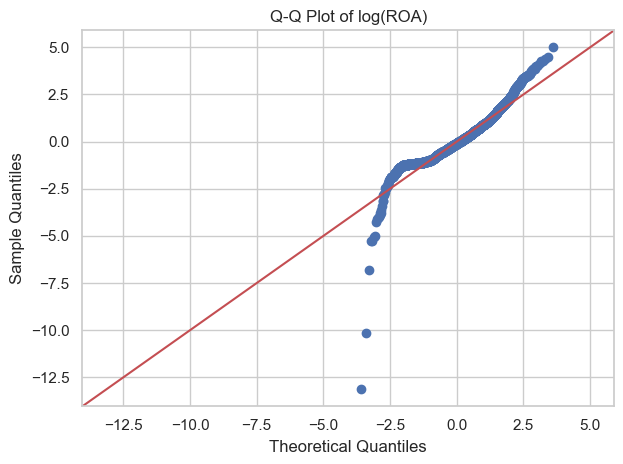

Kolmogorov–Smirnov Test for log(ROA):
  Test statistic: 0.0836059495
  p-value       : 0.0000000000
------------------------------------------------------------


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kstest, norm

# Copy to avoid modifying the original DataFrame
df_transformed = df.copy()

# Columns to transform
cols = ['EPS', 'ROA', 'ROE']

# Print minimum values before transformation
min_values = df[cols].min()
print("Minimum values before transformation:")
print(min_values)

# Log transformation with shifting to handle negative values
for col in cols:
    shift = abs(min_values[col]) + 1  # ensure positive values
    df_transformed[f'log_{col}'] = np.log(df_transformed[col] + shift)

# Check results
print("\nFirst few rows of the transformed columns:")
print(df_transformed[[f'log_{col}' for col in cols]].head())

# Function to check for log-normality
def check_log_normality(df, var):
    log_var = f'log_{var}'
    log_data = df[log_var].dropna()

    # Plot histogram and KDE
    plt.figure(figsize=(8, 5))
    sns.histplot(log_data, kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of log({var})')
    plt.xlabel(f'log({var})')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Q-Q plot
    sm.qqplot(log_data, line='45', fit=True)
    plt.title(f'Q-Q Plot of log({var})')
    plt.tight_layout()
    plt.show()

    # Kolmogorov–Smirnov test against normal distribution
    standardized_data = (log_data - log_data.mean()) / log_data.std()
    ks_stat, ks_pval = kstest(standardized_data, 'norm')

    print(f"Kolmogorov–Smirnov Test for log({var}):")
    print(f"  Test statistic: {ks_stat:.10f}")
    print(f"  p-value       : {ks_pval:.10f}")
    print("-" * 60)

# Variables to check
vars_to_check = ['EPS', 'ROE', 'ROA']

# Run the check
for var in vars_to_check:
    check_log_normality(df_transformed, var)


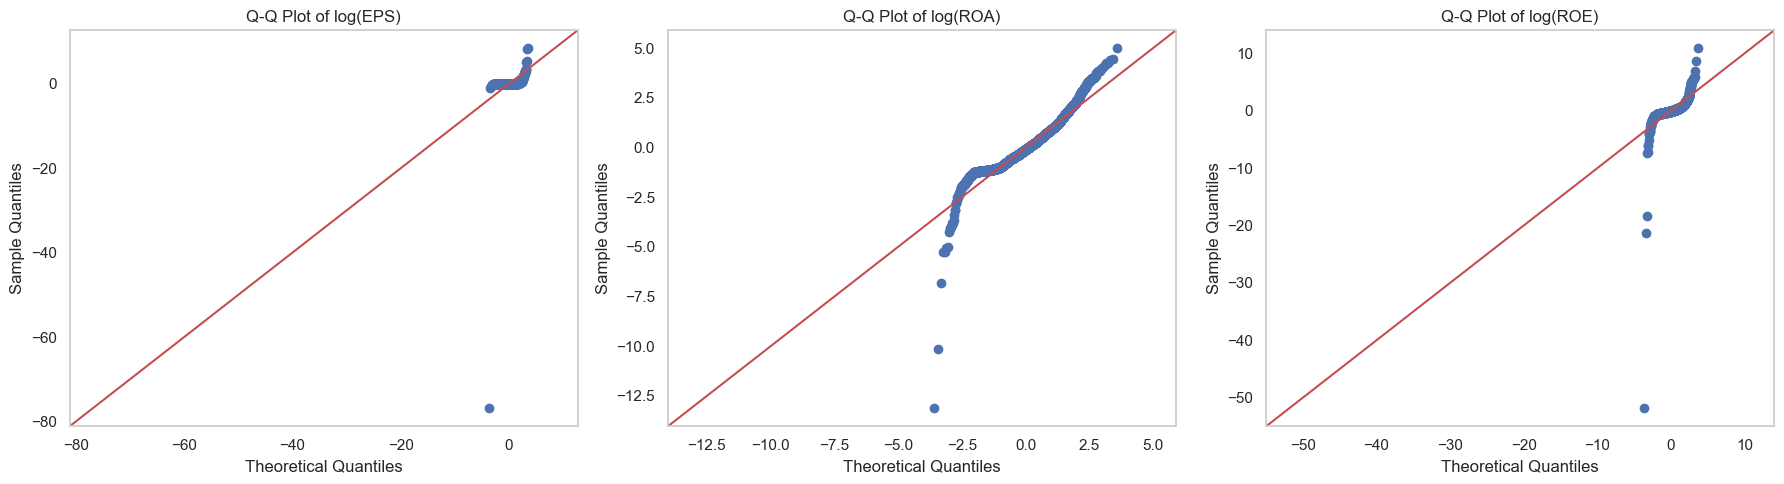

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kstest

# Copy to avoid modifying the original DataFrame
df_transformed = df.copy()

# Columns to transform
cols = ['EPS', 'ROA', 'ROE']
min_values = df[cols].min()

# Apply log transformation with shifting
for col in cols:
    shift = abs(min_values[col]) + 1
    df_transformed[f'log_{col}'] = np.log(df_transformed[col] + shift)

# --- Create one figure with Q-Q plots for each variable ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(cols):
    log_var = f'log_{var}'
    log_data = df_transformed[log_var].dropna()
    
    sm.qqplot(log_data, line='45', fit=True, ax=axes[i])
    axes[i].set_title(f'Q-Q Plot of log({var})')
    axes[i].grid(False)  # Disable the grid

plt.tight_layout()
plt.savefig("qq_plots_log_vars_EU.pdf")  # Save as PDF
plt.show()


# Check Polynomial assumption


--- Diagnostics for model with dependent variable: EPS ---
Kolmogorov-Smirnov test for normality of residuals:
  KS statistic: 0.36046
  p-value     : 0.00000
Anderson-Darling test for normality of residuals:
  A-D statistic: 1574.15292
  Critical values: [0.576 0.656 0.787 0.917 1.091]
  Significance levels: [15.  10.   5.   2.5  1. ]
    At 15.0% level: Reject normality
    At 10.0% level: Reject normality
    At 5.0% level: Reject normality
    At 2.5% level: Reject normality
    At 1.0% level: Reject normality

--- Diagnostics for model with dependent variable: ROA ---
Kolmogorov-Smirnov test for normality of residuals:
  KS statistic: 0.11414
  p-value     : 0.00000
Anderson-Darling test for normality of residuals:
  A-D statistic: 187.59687
  Critical values: [0.576 0.656 0.787 0.917 1.091]
  Significance levels: [15.  10.   5.   2.5  1. ]
    At 15.0% level: Reject normality
    At 10.0% level: Reject normality
    At 5.0% level: Reject normality
    At 2.5% level: Reject norma

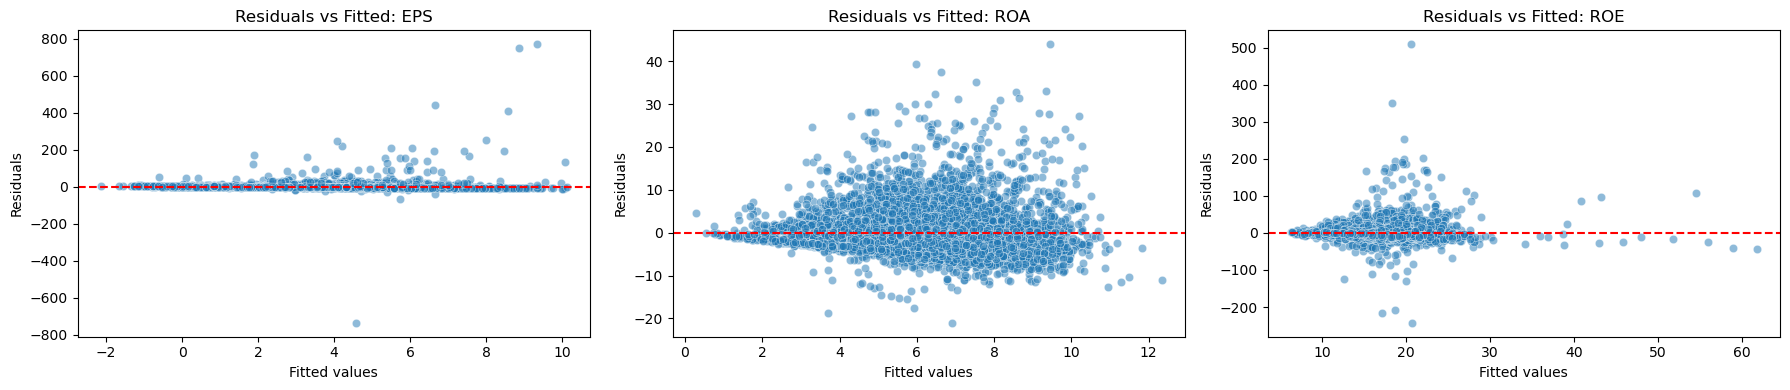

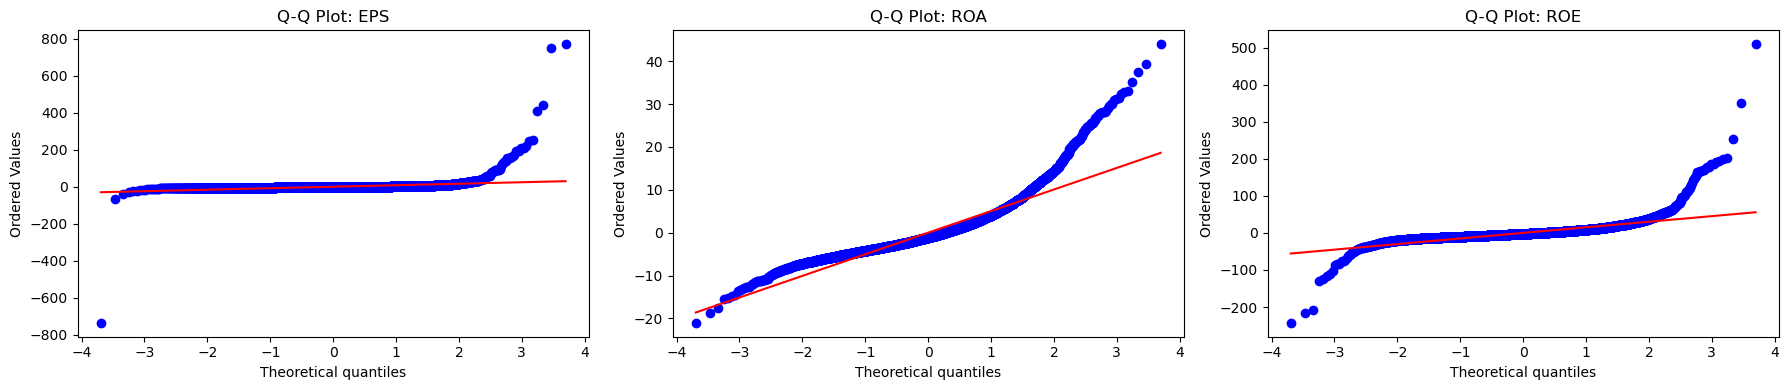

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pygam import LinearGAM, s
import numpy as np

# Assuming df is already cleaned and defined
X = df[['Env_score', 'Soc_score', 'Gov_score']].values
targets = ['EPS', 'ROA', 'ROE']

n_targets = len(targets)

# Side-by-side subplots: 1 row, n_targets columns
fig_resid, axes_resid = plt.subplots(1, n_targets, figsize=(6 * n_targets, 4))
fig_qq, axes_qq = plt.subplots(1, n_targets, figsize=(6 * n_targets, 4))

for i, target in enumerate(targets):
    y = df[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    residuals = gam.deviance_residuals(X, y)
    fitted = gam.predict(X)

    print(f"\n--- Diagnostics for model with dependent variable: {target} ---")

    # Kolmogorov-Smirnov Test
    standardized_resid = (residuals - np.mean(residuals)) / np.std(residuals)
    ks_stat, ks_pval = stats.kstest(standardized_resid, 'norm')
    print("Kolmogorov-Smirnov test for normality of residuals:")
    print(f"  KS statistic: {ks_stat:.5f}")
    print(f"  p-value     : {ks_pval:.5f}")

    # Anderson-Darling Test
    ad_result = stats.anderson(residuals, dist='norm')
    print("Anderson-Darling test for normality of residuals:")
    print(f"  A-D statistic: {ad_result.statistic:.5f}")
    print("  Critical values:", ad_result.critical_values)
    print("  Significance levels:", ad_result.significance_level)
    for cv, sl in zip(ad_result.critical_values, ad_result.significance_level):
        result = "Reject normality" if ad_result.statistic > cv else "Do not reject normality"
        print(f"    At {sl}% level: {result}")

    # Plot 1: Residuals vs Fitted
    ax1 = axes_resid[i]
    sns.scatterplot(x=fitted, y=residuals, alpha=0.5, ax=ax1)
    ax1.axhline(0, color='red', linestyle='--')
    ax1.set_title(f'Residuals vs Fitted: {target}')
    ax1.set_xlabel('Fitted values')
    ax1.set_ylabel('Residuals')

    # Plot 2: Q-Q Plot
    ax2 = axes_qq[i]
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot: {target}')

# Adjust layout and save
fig_resid.tight_layout()
fig_qq.tight_layout()

fig_resid.savefig('residuals_vs_fitted_all_targets_EU_1.pdf')
fig_qq.savefig('qq_plots_all_targets_EU_1.pdf')


# Optional: Show them if needed
# plt.show()


    # # --- Plot 3: Histogram of Residuals ---
    # plt.figure(figsize=(6, 4))
    # sns.histplot(residuals, kde=True, bins=30)
    # plt.title(f'Histogram of Residuals for {target}')
    # plt.xlabel('Residuals')
    # plt.tight_layout()
    # plt.show()





--- Diagnostics for model with dependent variable: ESG_score ---
Kolmogorov-Smirnov test for normality of residuals:
  KS statistic: 0.07284
  p-value     : 0.00000
Anderson-Darling test for normality of residuals:
  A-D statistic: 78.19905
  Critical values: [0.576 0.656 0.787 0.917 1.091]
  Significance levels: [15.  10.   5.   2.5  1. ]
    At 15.0% level: Reject normality
    At 10.0% level: Reject normality
    At 5.0% level: Reject normality
    At 2.5% level: Reject normality
    At 1.0% level: Reject normality

--- Diagnostics for model with dependent variable: Env_score ---
Kolmogorov-Smirnov test for normality of residuals:
  KS statistic: 0.09477
  p-value     : 0.00000
Anderson-Darling test for normality of residuals:
  A-D statistic: 114.77149
  Critical values: [0.576 0.656 0.787 0.917 1.091]
  Significance levels: [15.  10.   5.   2.5  1. ]
    At 15.0% level: Reject normality
    At 10.0% level: Reject normality
    At 5.0% level: Reject normality
    At 2.5% level: Re

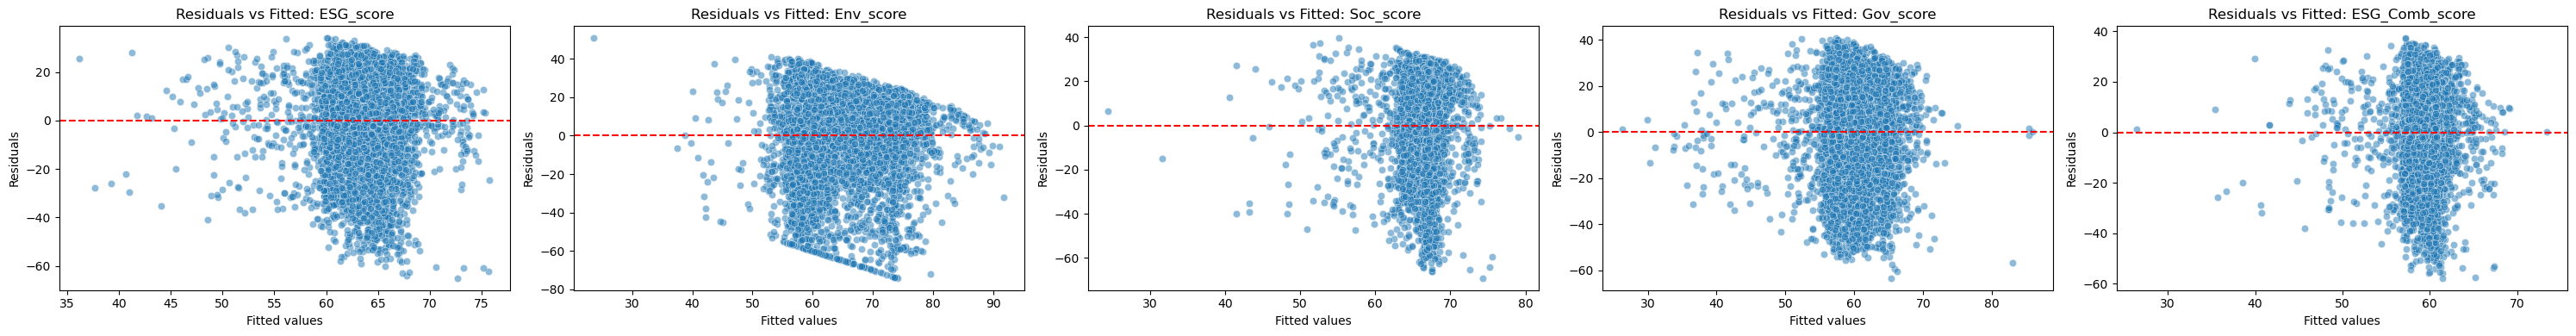

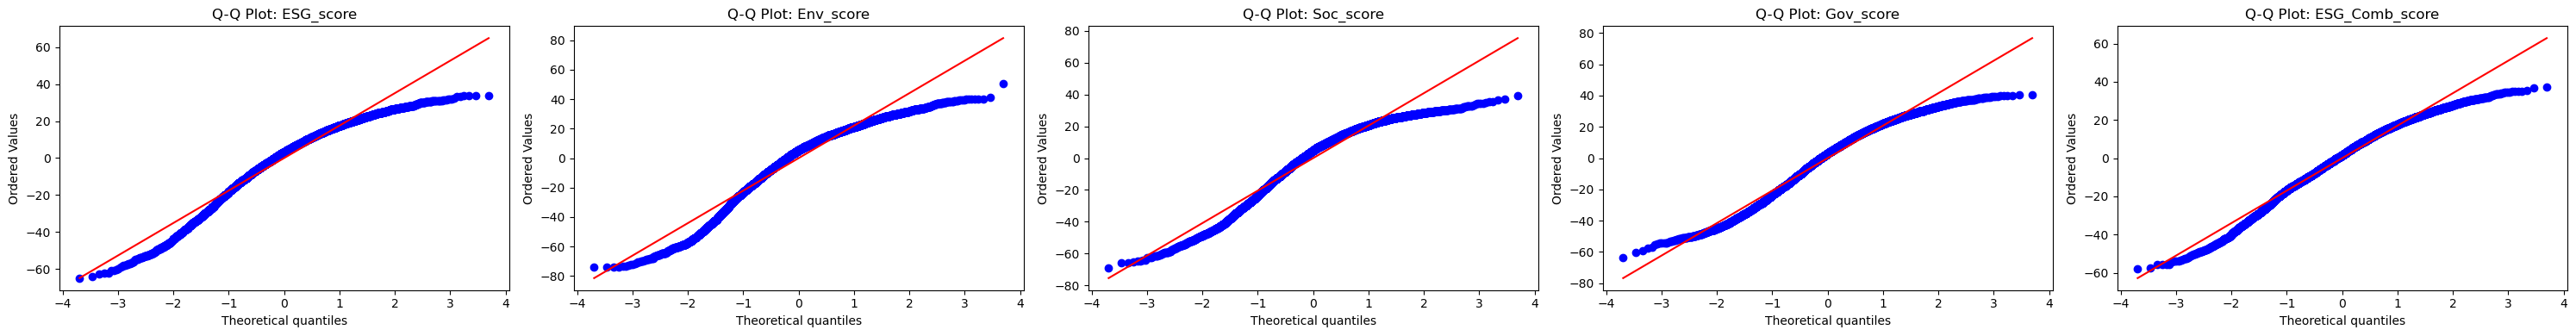

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pygam import LinearGAM, s
import numpy as np

# Assuming df is already defined and cleaned
X = df[['EPS', 'ROA', 'ROE']].values
targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

n_targets = len(targets)

# Create side-by-side subplots
fig_resid, axes_resid = plt.subplots(1, n_targets, figsize=(6 * n_targets, 4))
fig_qq, axes_qq = plt.subplots(1, n_targets, figsize=(6 * n_targets, 4))

for i, target in enumerate(targets):
    y = df[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    residuals = gam.deviance_residuals(X, y)
    fitted = gam.predict(X)

    print(f"\n--- Diagnostics for model with dependent variable: {target} ---")

    # Kolmogorov-Smirnov Test
    standardized_resid = (residuals - np.mean(residuals)) / np.std(residuals)
    ks_stat, ks_pval = stats.kstest(standardized_resid, 'norm')
    print("Kolmogorov-Smirnov test for normality of residuals:")
    print(f"  KS statistic: {ks_stat:.5f}")
    print(f"  p-value     : {ks_pval:.5f}")

    # Anderson-Darling Test
    ad_result = stats.anderson(residuals, dist='norm')
    print("Anderson-Darling test for normality of residuals:")
    print(f"  A-D statistic: {ad_result.statistic:.5f}")
    print("  Critical values:", ad_result.critical_values)
    print("  Significance levels:", ad_result.significance_level)
    for cv, sl in zip(ad_result.critical_values, ad_result.significance_level):
        result = "Reject normality" if ad_result.statistic > cv else "Do not reject normality"
        print(f"    At {sl}% level: {result}")

    # Plot 1: Residuals vs Fitted
    ax1 = axes_resid[i]
    sns.scatterplot(x=fitted, y=residuals, alpha=0.5, ax=ax1)
    ax1.axhline(0, color='red', linestyle='--')
    ax1.set_title(f'Residuals vs Fitted: {target}')
    ax1.set_xlabel('Fitted values')
    ax1.set_ylabel('Residuals')

    # Plot 2: Q-Q Plot
    ax2 = axes_qq[i]
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot: {target}')

# Adjust layout and save
fig_resid.tight_layout()
fig_qq.tight_layout()

fig_resid.savefig('residuals_vs_fitted_all_targets_EU_2.pdf')
fig_qq.savefig('qq_plots_all_targets_EU_2.pdf')

    # # --- Plot 3: Histogram of Residuals ---
    # plt.figure(figsize=(6, 4))
    # sns.histplot(residuals, kde=True, bins=30)
    # plt.title(f'Histogram of Residuals for {target}')
    # plt.xlabel('Residuals')
    # plt.tight_layout()
    # plt.show()



# Scatter plot

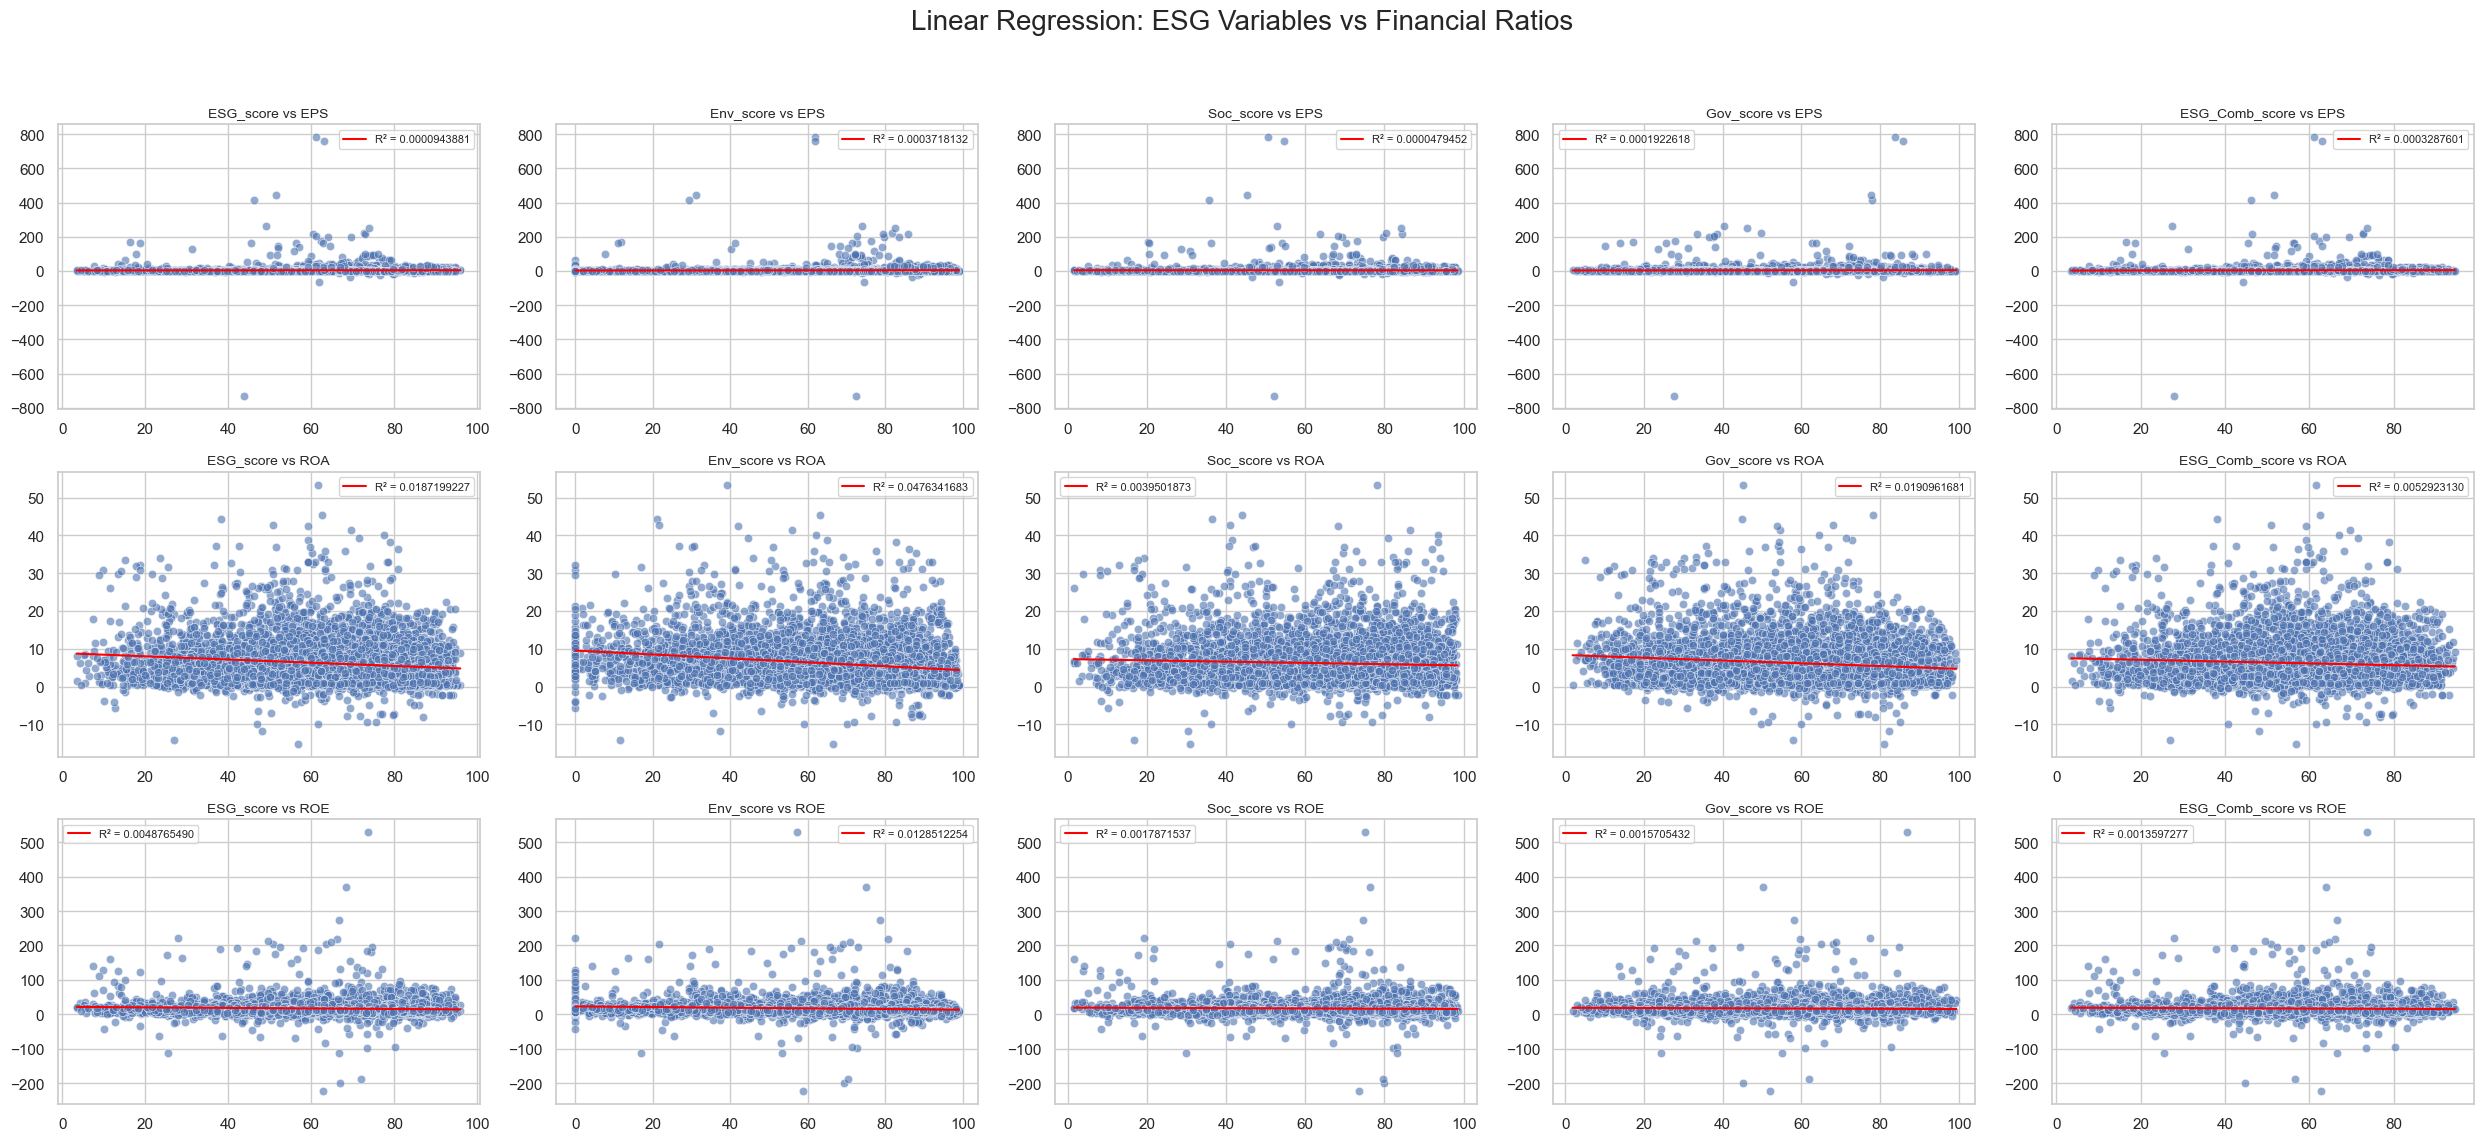

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import os

# Define ESG variables and financial ratios
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
financial_ratios = ['EPS', 'ROA', 'ROE']

# Create output directory
output_dir = "regression_plots"
os.makedirs(output_dir, exist_ok=True)

# Set style
sns.set(style="whitegrid", context="notebook")

# Create one large figure with 3 rows (ratios) x 5 columns (ESG vars)
fig, axes = plt.subplots(len(financial_ratios), len(esg_vars), figsize=(25, 12), sharey=False)
fig.suptitle('Linear Regression: ESG Variables vs Financial Ratios', fontsize=20)

# Loop through each subplot
for row_idx, ratio in enumerate(financial_ratios):
    for col_idx, esg_var in enumerate(esg_vars):
        ax = axes[row_idx, col_idx]
        
        # Clean data
        sub_df = df[[esg_var, ratio]].dropna()
        X = sub_df[[esg_var]].values
        y = sub_df[ratio].values

        # Fit model
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)

        # Plot
        sns.scatterplot(x=X.flatten(), y=y, ax=ax, alpha=0.6)
        sns.lineplot(x=X.flatten(), y=y_pred, ax=ax, color='red', label=f'R² = {r2:.10f}')
        ax.set_title(f'{esg_var} vs {ratio}', fontsize=10)
        ax.legend(fontsize=8)

# Adjust layout and save figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# pdf_path = os.path.join(output_dir, 'ESG_vs_FinancialRatios_All.pdf')
# jpg_path = os.path.join(output_dir, 'ESG_vs_FinancialRatios_All.jpg')
# plt.savefig(pdf_path)
# plt.savefig(jpg_path, dpi=300)
plt.show()

### By Market Capitalization Category

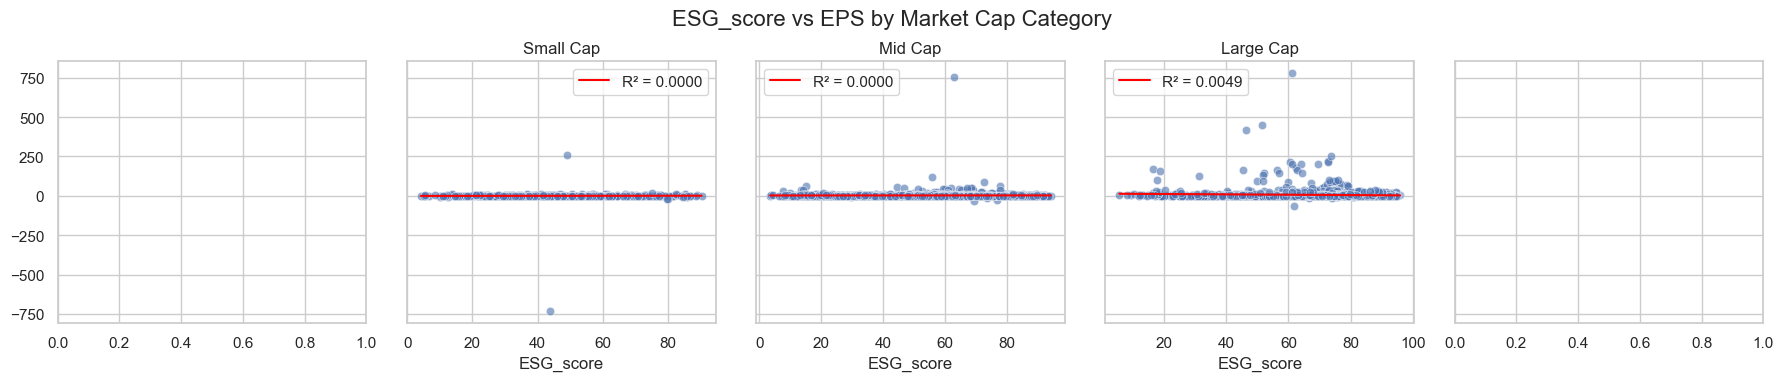

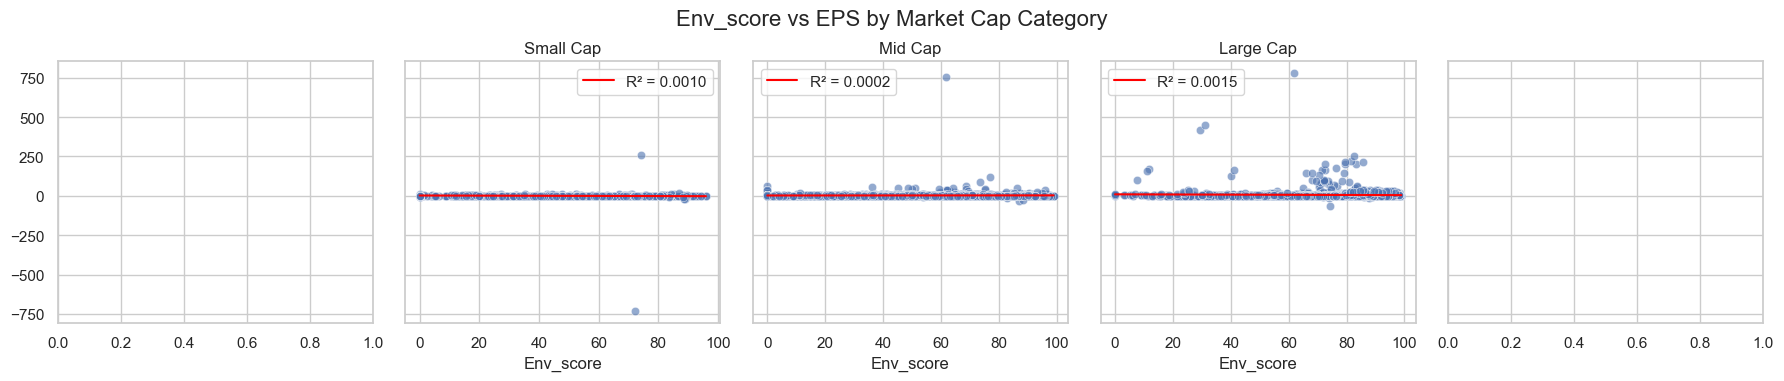

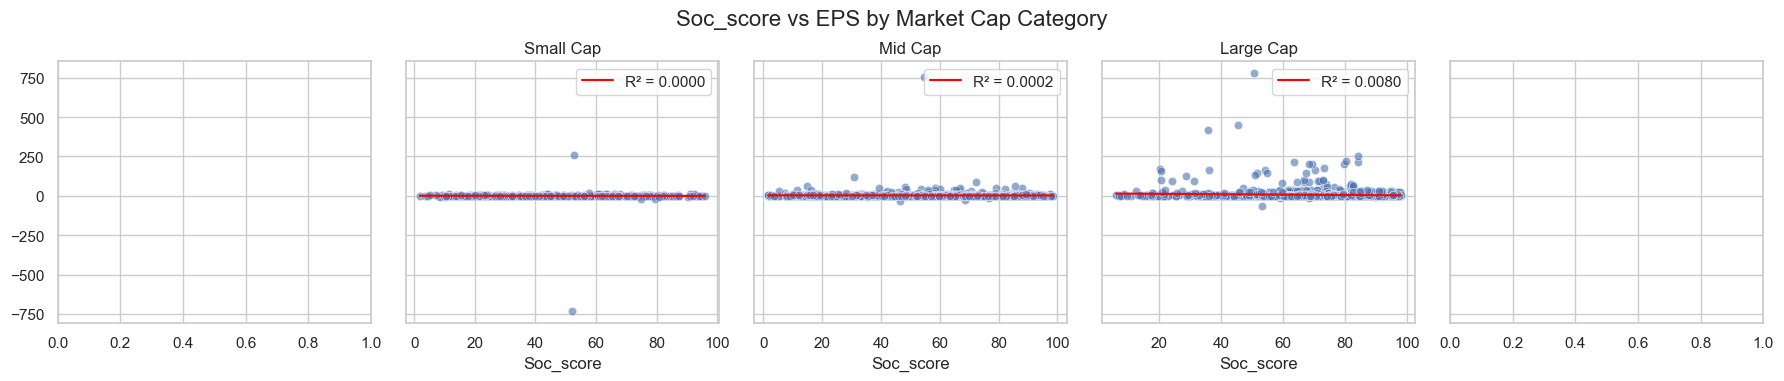

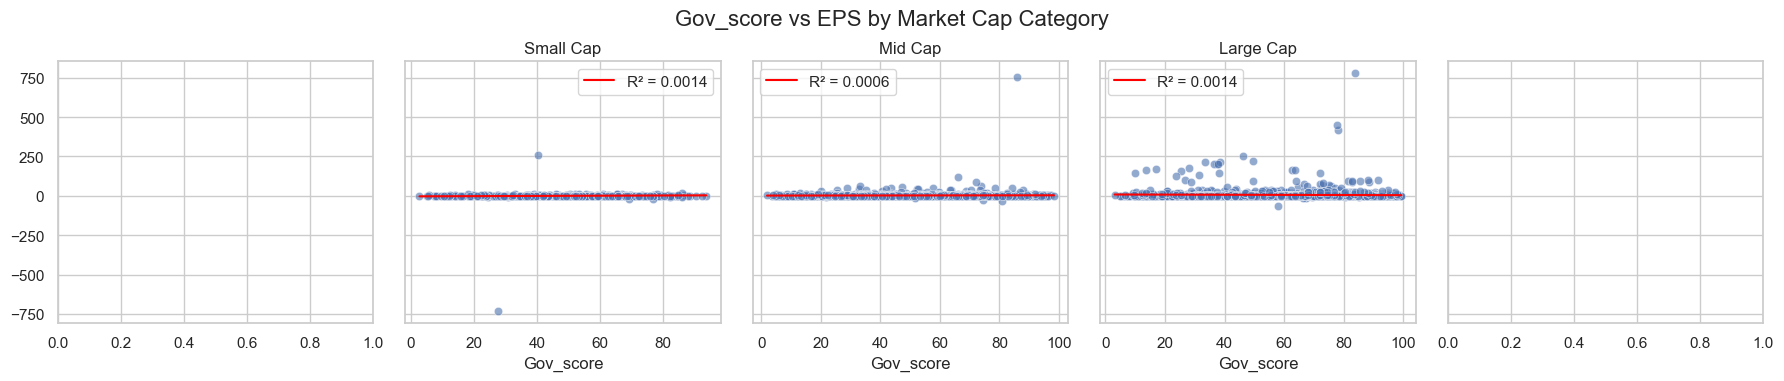

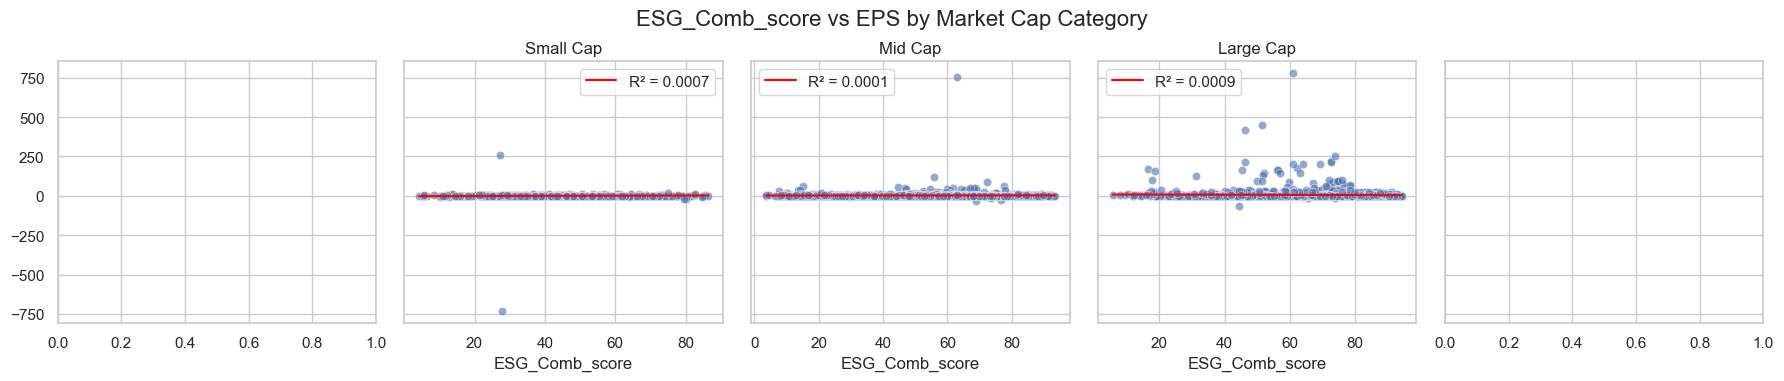

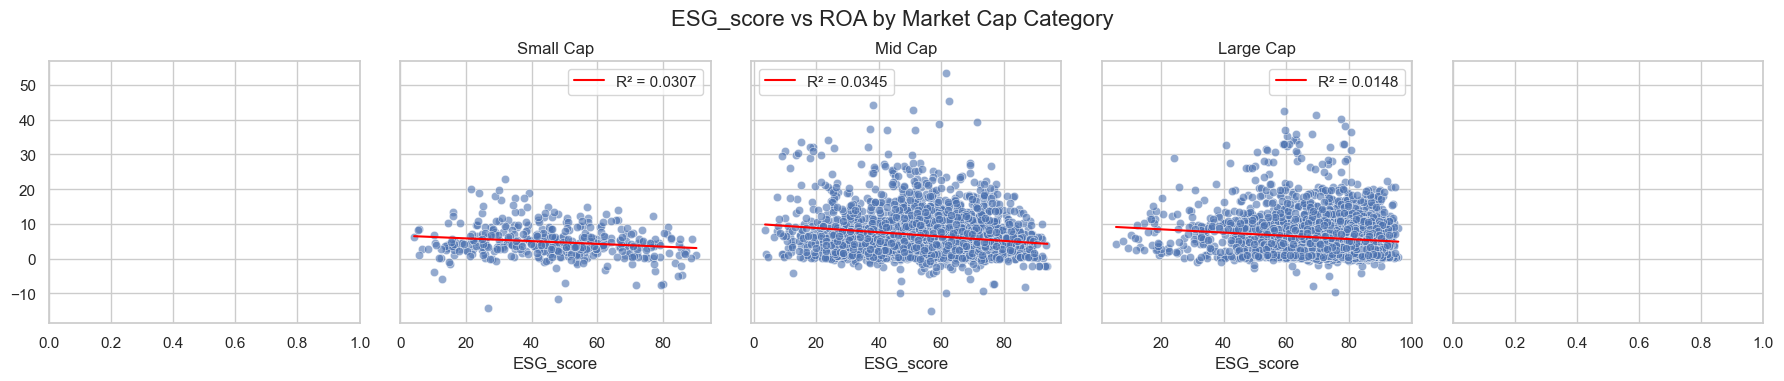

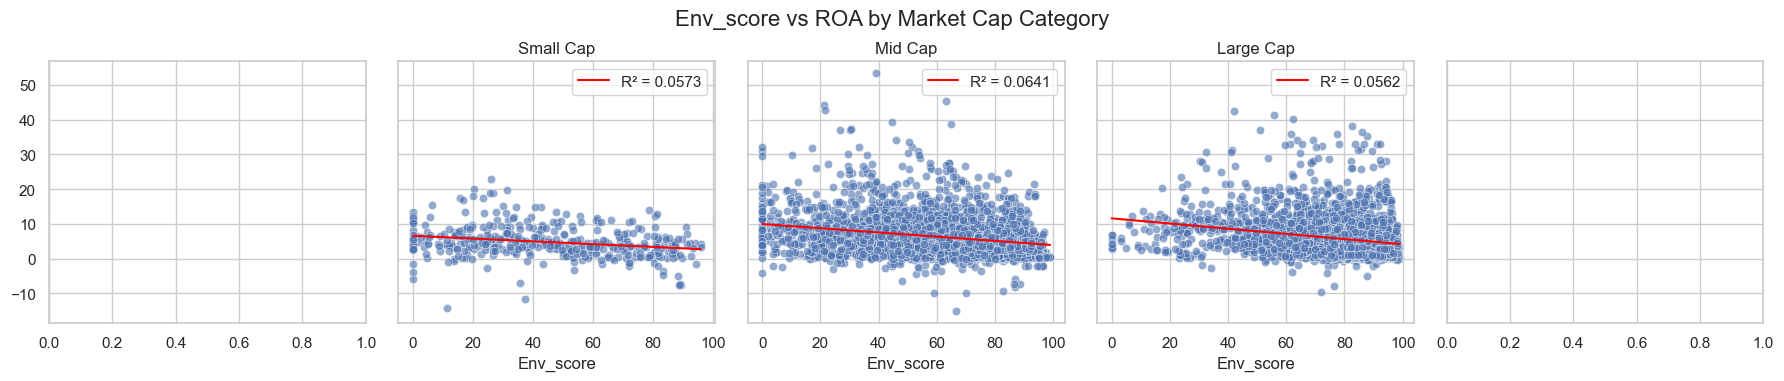

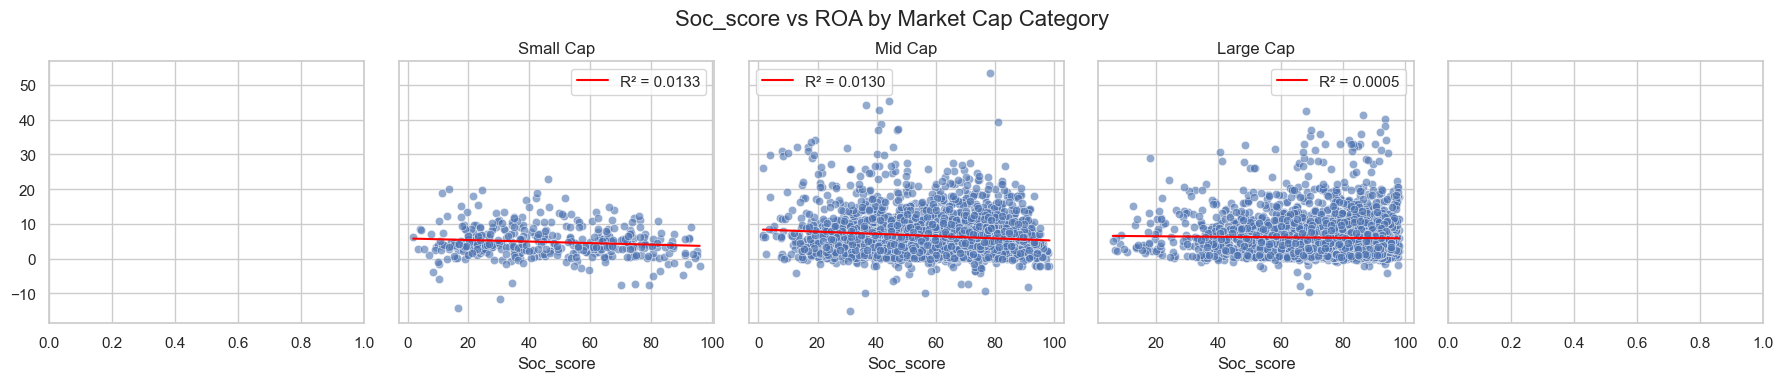

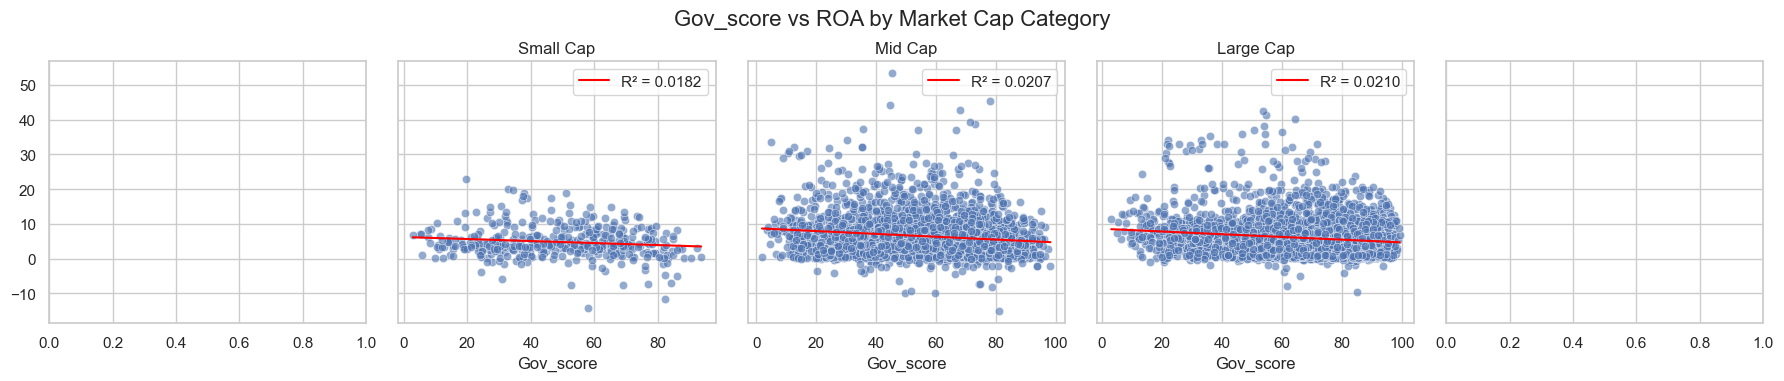

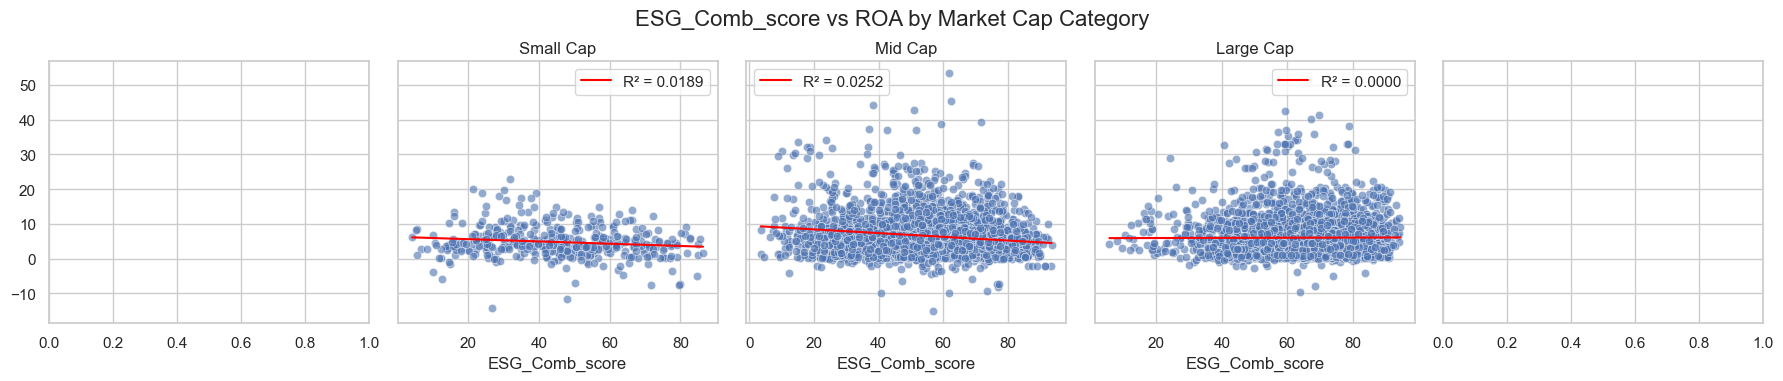

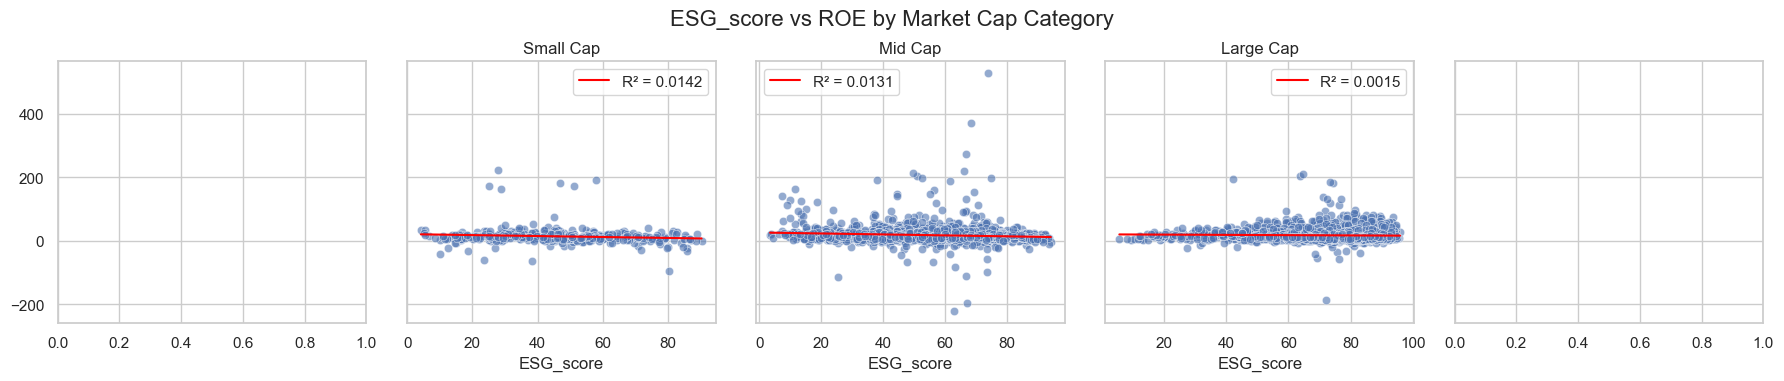

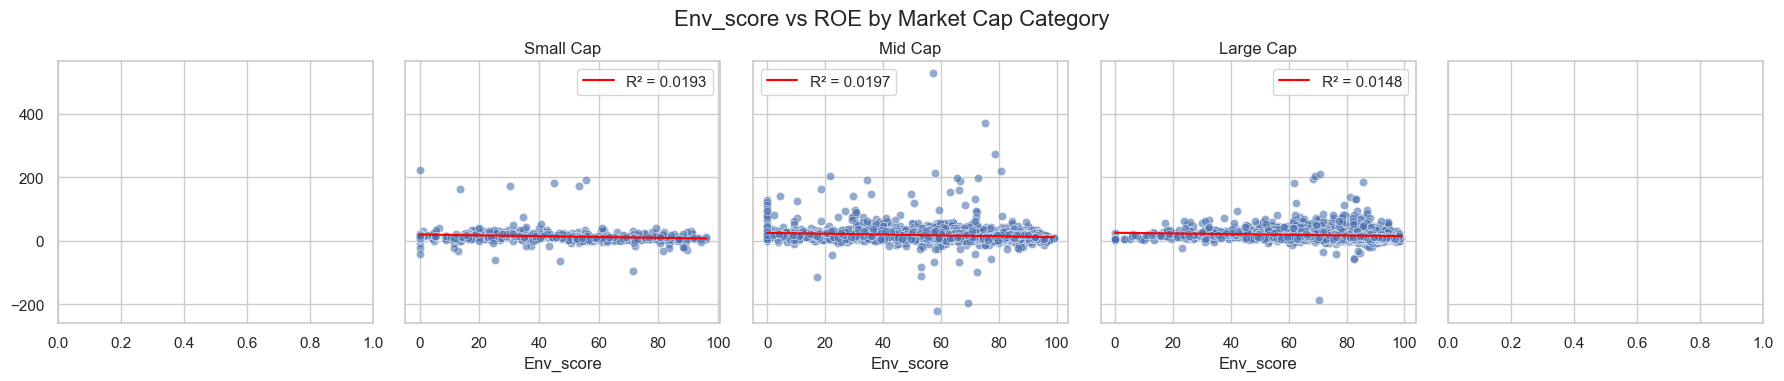

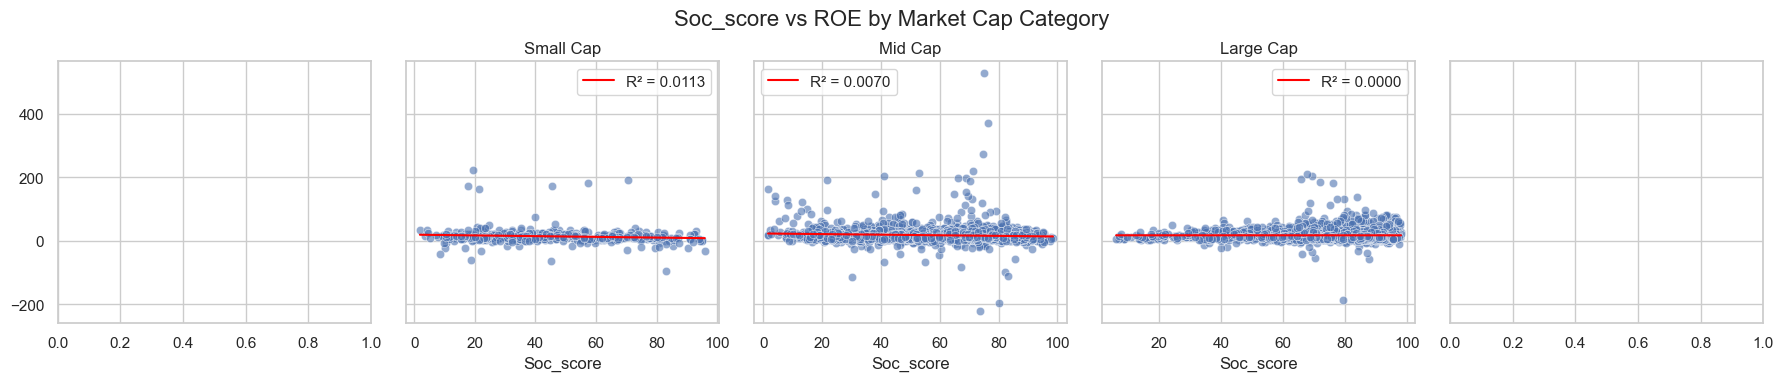

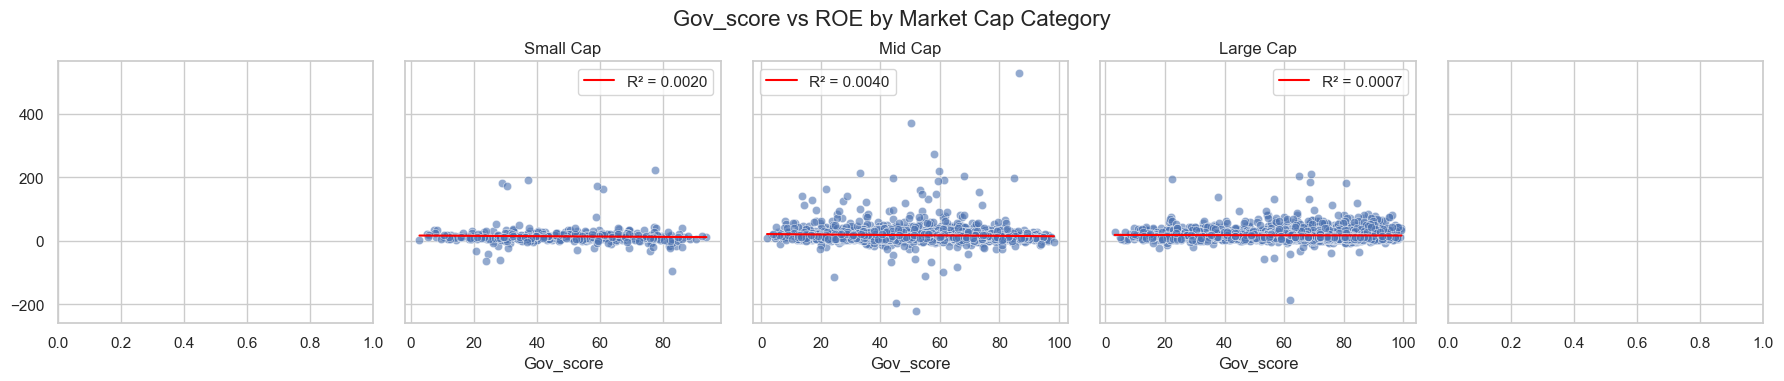

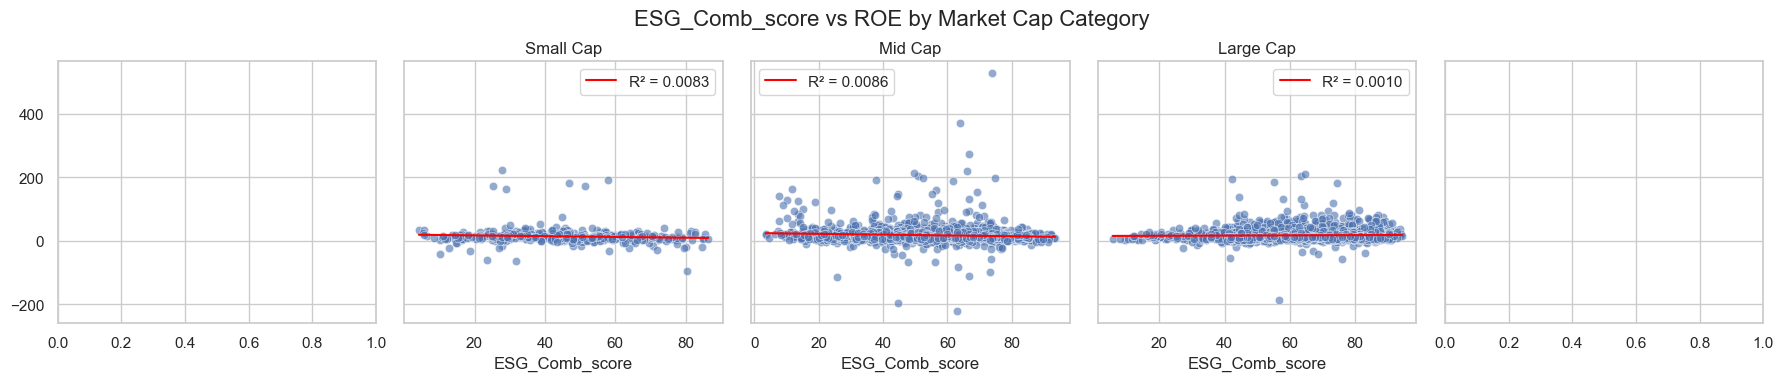

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import os

# Categorize Market Capitalization into bins if not done already
def categorize_market_cap(market_cap):
    if market_cap < 2e9:
        return 'Small Cap'
    elif 2e9 <= market_cap < 10e9:
        return 'Mid Cap'
    else:
        return 'Large Cap'

# Create category column
df['MarketCap_Category'] = df['MarketCap'].apply(categorize_market_cap)

# ESG variables and financial ratios
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
financial_ratios = ['EPS', 'ROA', 'ROE']
categories = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

# Plotting style
sns.set(style="whitegrid", context="notebook")

# Output directory
output_dir = "regression_outputs"
os.makedirs(output_dir, exist_ok=True)

# Loop over financial ratios and ESG variables
for ratio in financial_ratios:
    for esg_var in esg_vars:
        fig, axes = plt.subplots(1, len(categories), figsize=(18, 4), sharey=True)
        fig.suptitle(f'{esg_var} vs {ratio} by Market Cap Category', fontsize=16)

        for i, cat in enumerate(categories):
            # Filter and drop NA
            sub_df = df[df['MarketCap_Category'] == cat][[esg_var, ratio]].dropna()
            if sub_df.empty:
                continue

            X = sub_df[[esg_var]].values
            y = sub_df[ratio].values

            # Linear regression
            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)
            r2 = r2_score(y, y_pred)

            # Plotting
            sns.scatterplot(x=X.flatten(), y=y, ax=axes[i], alpha=0.6)
            sns.lineplot(x=X.flatten(), y=y_pred, ax=axes[i], color='red', label=f'R² = {r2:.4f}')
            axes[i].set_title(f'{cat}')
            axes[i].set_xlabel(esg_var)
            axes[i].set_ylabel(ratio)
            axes[i].legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.90])
        plt.subplots_adjust(top=0.85)

        # Save plot
        # filename = f'{esg_var}_vs_{ratio}_by_MarketCap.jpg'
        # plt.savefig(os.path.join(output_dir, filename), dpi=300)
        plt.show()

# GAM

### financial ratios as dependent

In [49]:
import numpy as np
import pandas as pd
from pygam import LinearGAM, s
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error

# Clean your data
df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'EPS', 'ROA', 'ROE'])
X = df_clean[['Env_score', 'Soc_score', 'Gov_score']].values

# Store results
best_polynomials = {}

# Loop over financial targets
for target in ['EPS', 'ROA', 'ROE']:
    y = df_clean[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    feature_names = ['Env_score', 'Soc_score', 'Gov_score']
    poly_dict = {}

    for i, feature in enumerate(feature_names):
        grid = gam.generate_X_grid(term=i)
        f_vals = gam.partial_dependence(term=i, X=grid).flatten()
        x_vals = grid[:, i]

        best_mse = np.inf
        best_deg = None
        best_coef = None

        for deg in range(1, 20):  # Degrees 1 through 6
            p = Polynomial.fit(x_vals, f_vals, deg=deg).convert()
            y_pred = p(x_vals)
            mse = mean_squared_error(f_vals, y_pred)

            if mse < best_mse:
                best_mse = mse
                best_deg = deg
                best_coef = p.coef

        poly_dict[feature] = {
            'best_degree': best_deg,
            'mse': best_mse,
            'coefficients': best_coef
        }

    best_polynomials[target] = poly_dict


In [51]:
for target, feature_dict in best_polynomials.items():
    print(f"\nTarget variable: {target}")
    for feature, result in feature_dict.items():
        print(f"  Feature: {feature}")
        print(f"    Best Degree: {result['best_degree']}")
        print(f"    MSE: {result['mse']:.6f}")
        print(f"    Coefficients: {result['coefficients']}")



Target variable: EPS
  Feature: Env_score
    Best Degree: 19
    MSE: 0.070840
    Coefficients: [-1.54559235e+00 -3.05307211e-01 -8.16071654e-02  1.91121051e-01
 -8.17838712e-02  1.82106426e-02 -2.45804158e-03  2.17574909e-04
 -1.33357788e-05  5.88139665e-07 -1.91600872e-08  4.68857593e-10
 -8.69386170e-12  1.22315023e-13 -1.29704811e-15  1.01966525e-17
 -5.76125088e-20  2.21178886e-22 -5.16566433e-25  5.53938244e-28]
  Feature: Soc_score
    Best Degree: 19
    MSE: 0.013841
    Coefficients: [-6.70026190e+00  1.15759428e+01 -6.61939361e+00  1.95931258e+00
 -3.40157782e-01  3.69339975e-02 -2.58272159e-03  1.14605576e-04
 -2.79118086e-06 -1.77438617e-09  3.00234037e-09 -1.28960815e-10
  3.22271904e-12 -5.51483202e-14  6.74497367e-16 -5.92401640e-18
  3.66189810e-20 -1.51556159e-22  3.77475529e-25 -4.28110758e-28]
  Feature: Gov_score
    Best Degree: 19
    MSE: 0.096546
    Coefficients: [-1.85059108e+01  1.89271349e+01 -9.13873477e+00  2.40501327e+00
 -3.75045511e-01  3.69570998e-

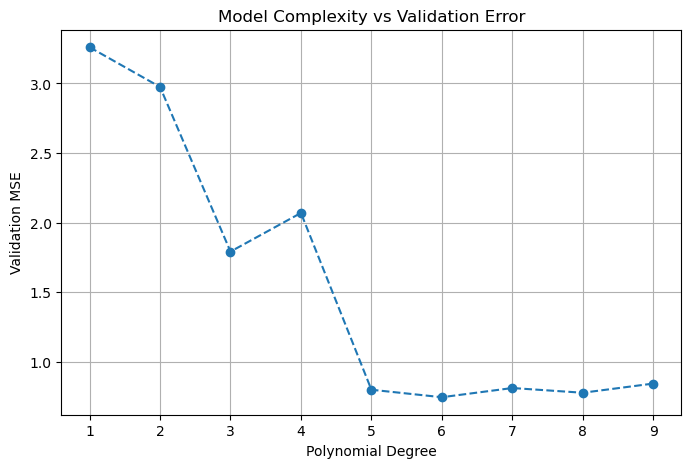

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.polynomial.polynomial import Polynomial

# Assume x_vals and f_vals come from your GAM partial dependence output
# For example: 
# x_vals = grid[:, i]
# f_vals = gam.partial_dependence(term=i, X=grid).flatten()

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_vals, f_vals, test_size=0.3, random_state=42)

# Store MSE for each degree
degrees = range(1, 10)  # test polynomial degrees from 1 to 9
mse_list = []

for deg in degrees:
    p = Polynomial.fit(x_train, y_train, deg).convert()
    y_pred = p(x_val)
    mse = mean_squared_error(y_val, y_pred)
    mse_list.append(mse)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_list, marker='o', linestyle='--')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation MSE')
plt.title('Model Complexity vs Validation Error')
plt.grid(True)
plt.xticks(degrees)
plt.show()


In [59]:
targets = ['EPS', 'ROA', 'ROE']
features = ['Env_score', 'Soc_score', 'Gov_score']

for target in targets:
    y = df_clean[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    for i, feature in enumerate(features):
        grid = gam.generate_X_grid(term=i)
        f_vals = gam.partial_dependence(term=i, X=grid).flatten()
        x_vals = grid[:, i]

        # Now do the degree-vs-error plot here
        # (use the code I gave you before inside this loop)


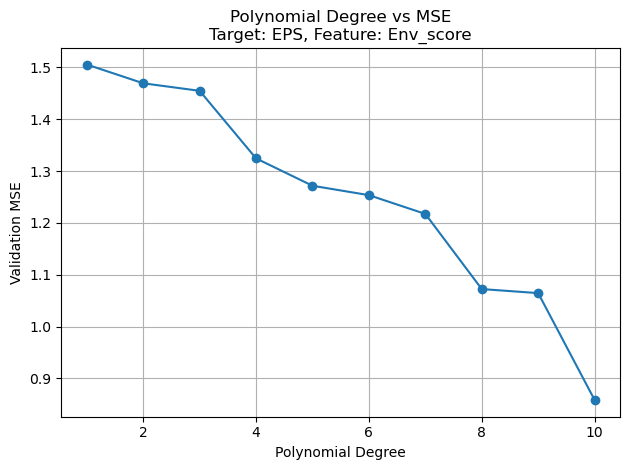

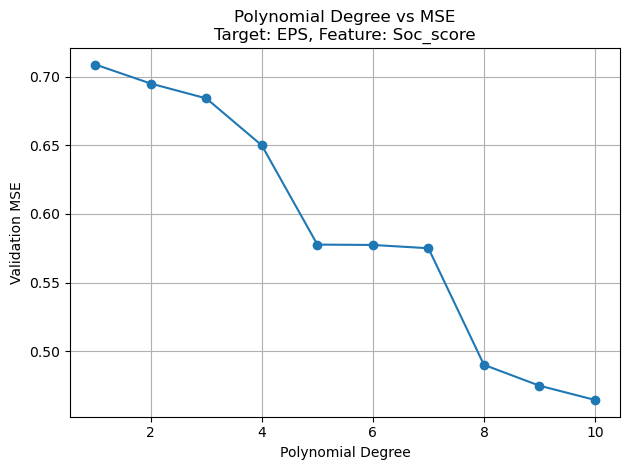

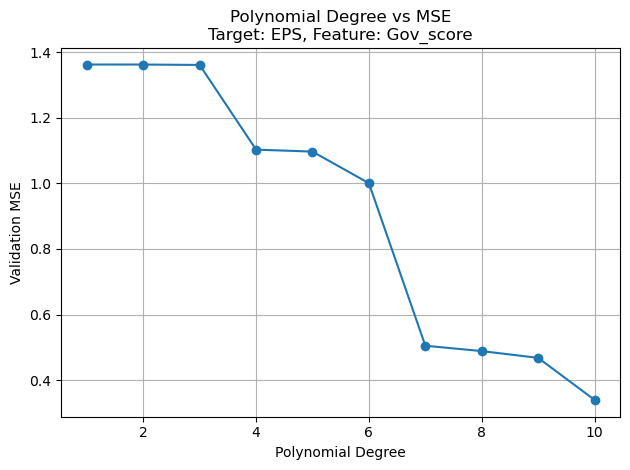

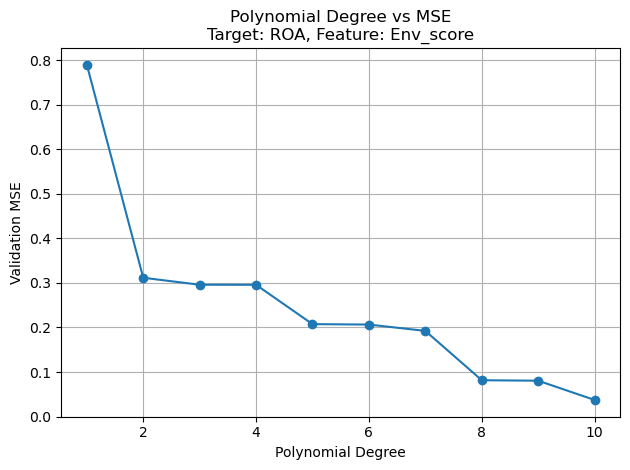

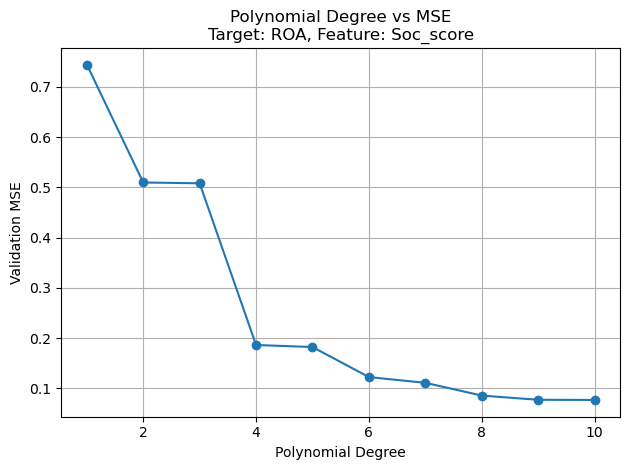

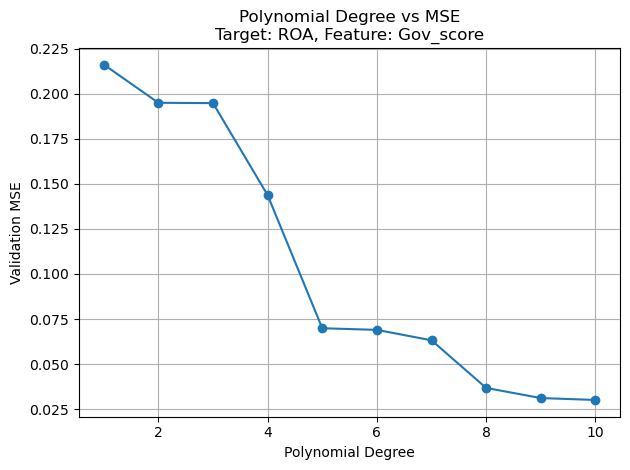

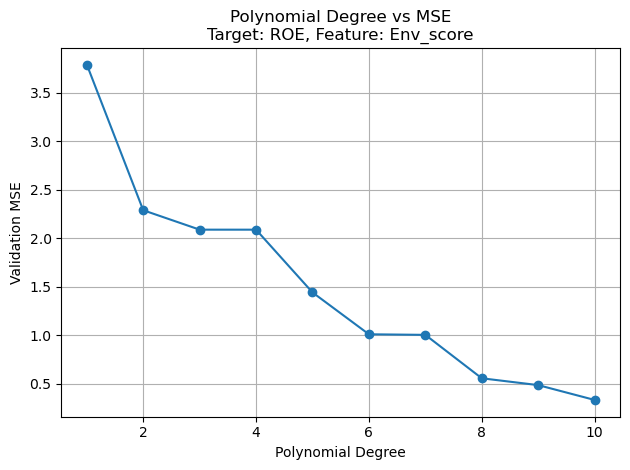

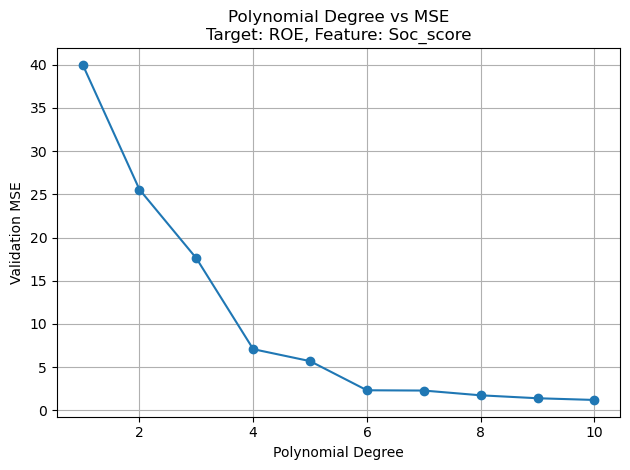

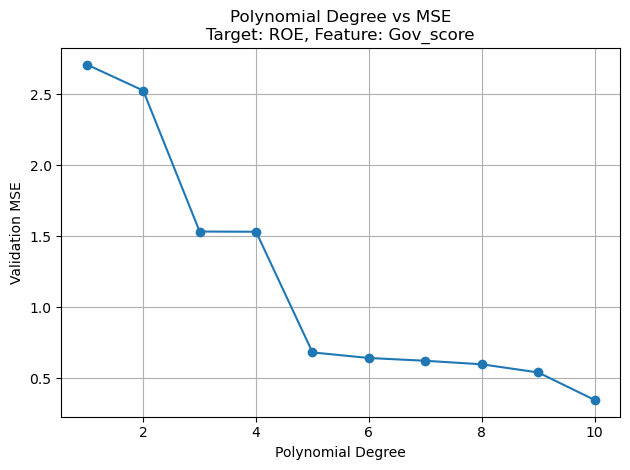

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error

# Clean the data
df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'EPS', 'ROA', 'ROE'])
X = df_clean[['Env_score', 'Soc_score', 'Gov_score']].values

# Target and feature names
targets = ['EPS', 'ROA', 'ROE']
features = ['Env_score', 'Soc_score', 'Gov_score']

# Plot polynomial degree vs MSE for each (target, feature) pair
for target in targets:
    y = df_clean[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    for i, feature in enumerate(features):
        grid = gam.generate_X_grid(term=i)
        f_vals = gam.partial_dependence(term=i, X=grid).flatten()
        x_vals = grid[:, i]

        degrees = range(1, 11)
        mse_values = []

        for deg in degrees:
            p = Polynomial.fit(x_vals, f_vals, deg=deg)
            y_pred = p(x_vals)
            mse = mean_squared_error(f_vals, y_pred)
            mse_values.append(mse)

        # Plotting
        plt.figure()
        plt.plot(degrees, mse_values, marker='o')
        plt.title(f'Polynomial Degree vs MSE\nTarget: {target}, Feature: {feature}')
        plt.xlabel('Polynomial Degree')
        plt.ylabel('Validation MSE')
        plt.grid(True)
        plt.tight_layout()

plt.show()


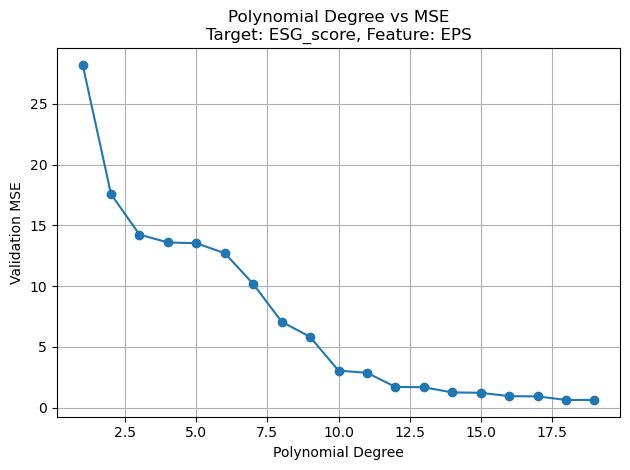

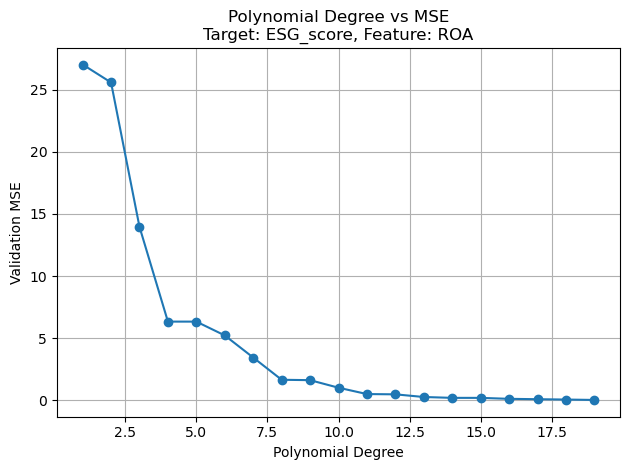

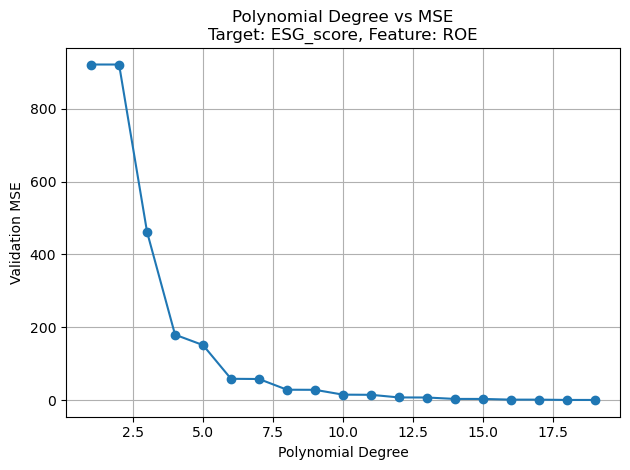

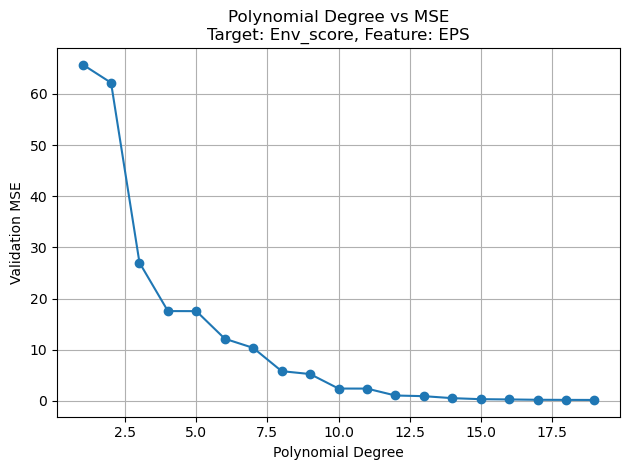

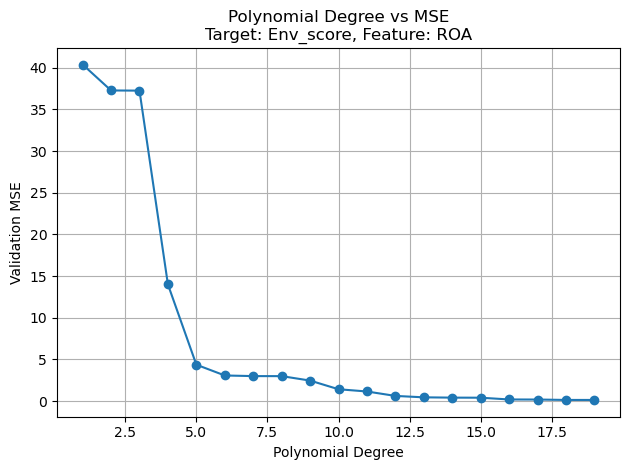

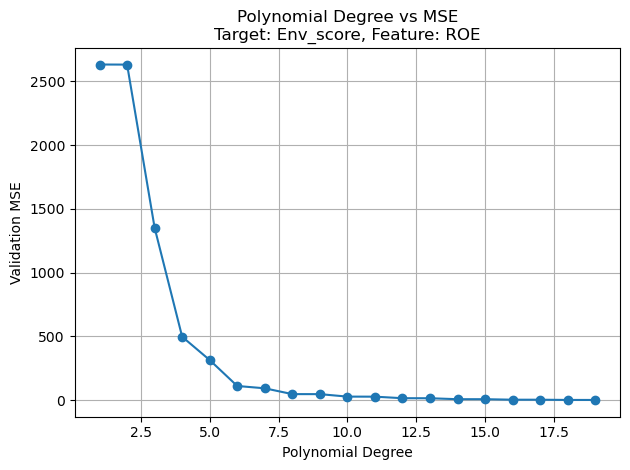

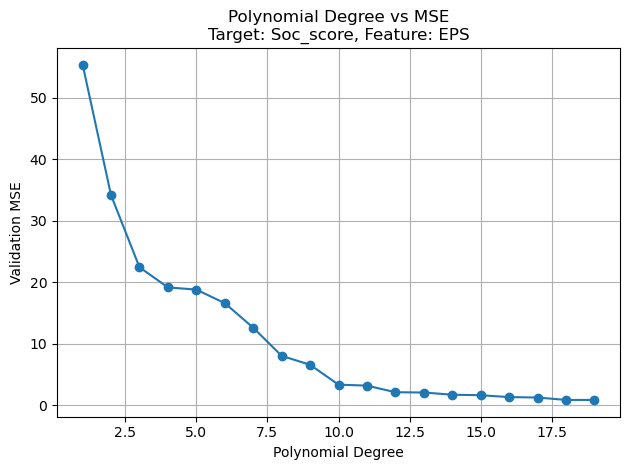

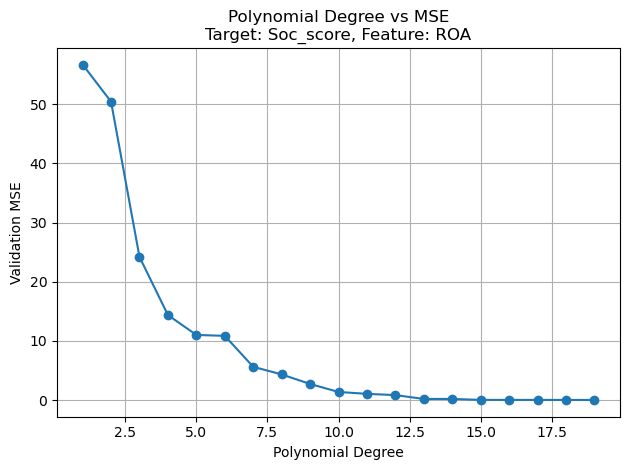

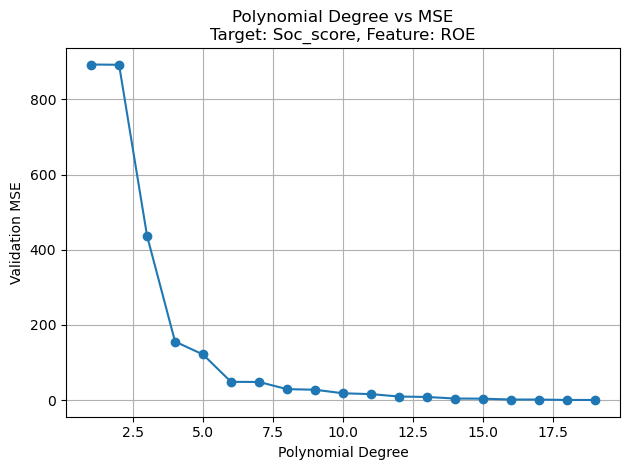

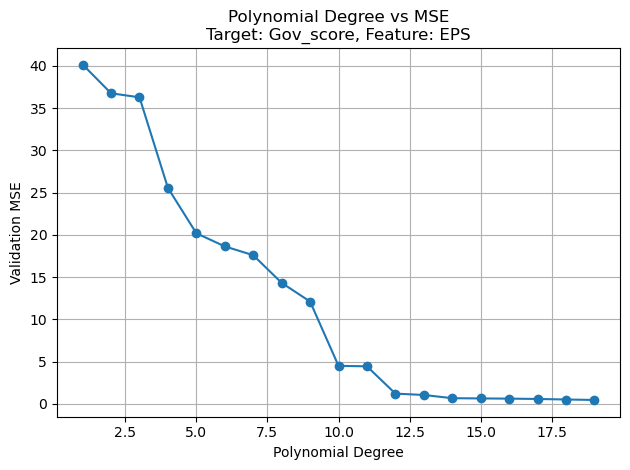

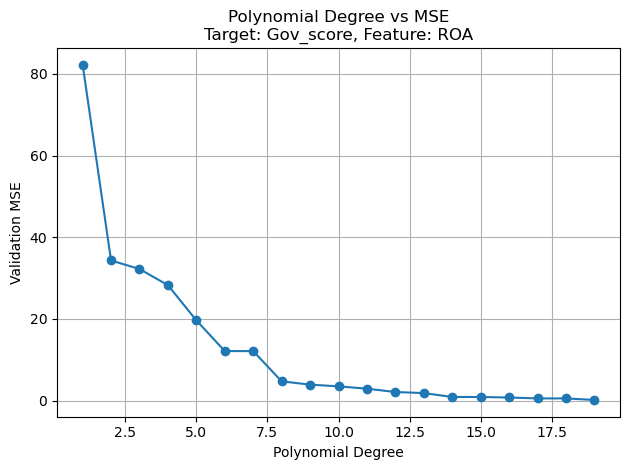

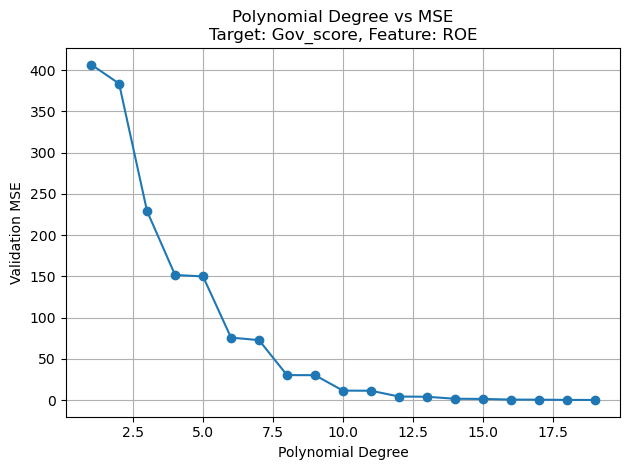

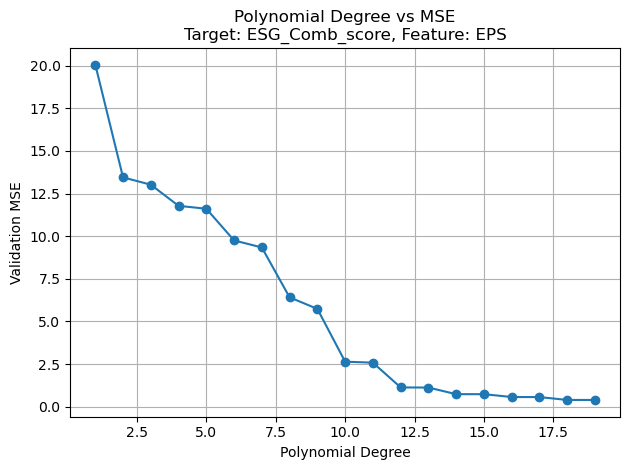

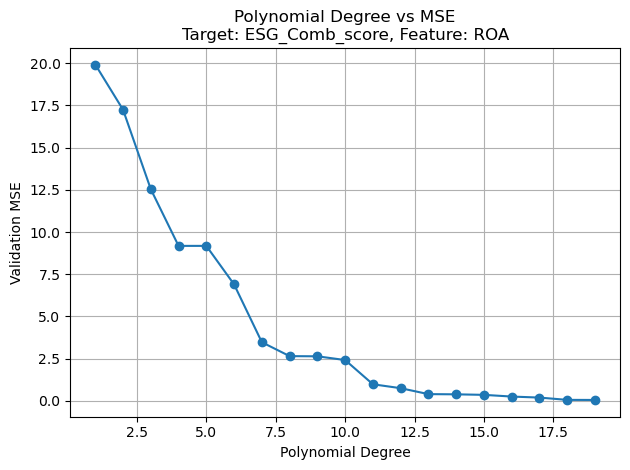

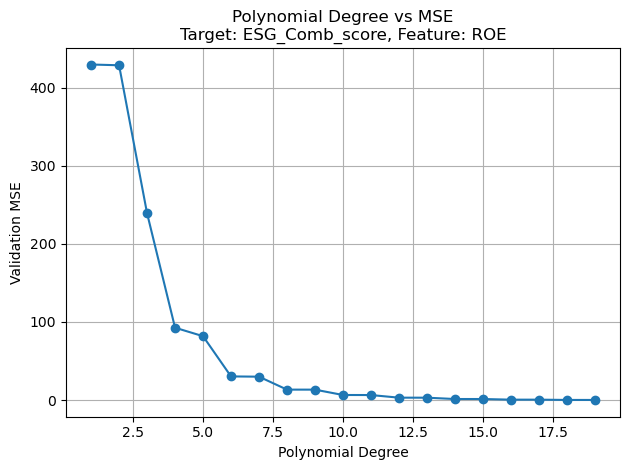

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error

# Clean the data
df_clean = df.dropna(subset=['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'EPS', 'ROA', 'ROE'])
X = df_clean[['ROE', 'ROA', 'EPS']].values

# Target and feature names
targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
features = ['EPS', 'ROA', 'ROE']

# Plot polynomial degree vs MSE for each (target, feature) pair
for target in targets:
    y = df_clean[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    for i, feature in enumerate(features):
        grid = gam.generate_X_grid(term=i)
        f_vals = gam.partial_dependence(term=i, X=grid).flatten()
        x_vals = grid[:, i]

        degrees = range(1, 20)
        mse_values = []

        for deg in degrees:
            p = Polynomial.fit(x_vals, f_vals, deg=deg)
            y_pred = p(x_vals)
            mse = mean_squared_error(f_vals, y_pred)
            mse_values.append(mse)

        # Plotting
        plt.figure()
        plt.plot(degrees, mse_values, marker='o')
        plt.title(f'Polynomial Degree vs MSE\nTarget: {target}, Feature: {feature}')
        plt.xlabel('Polynomial Degree')
        plt.ylabel('Validation MSE')
        plt.grid(True)
        plt.tight_layout()

plt.show()


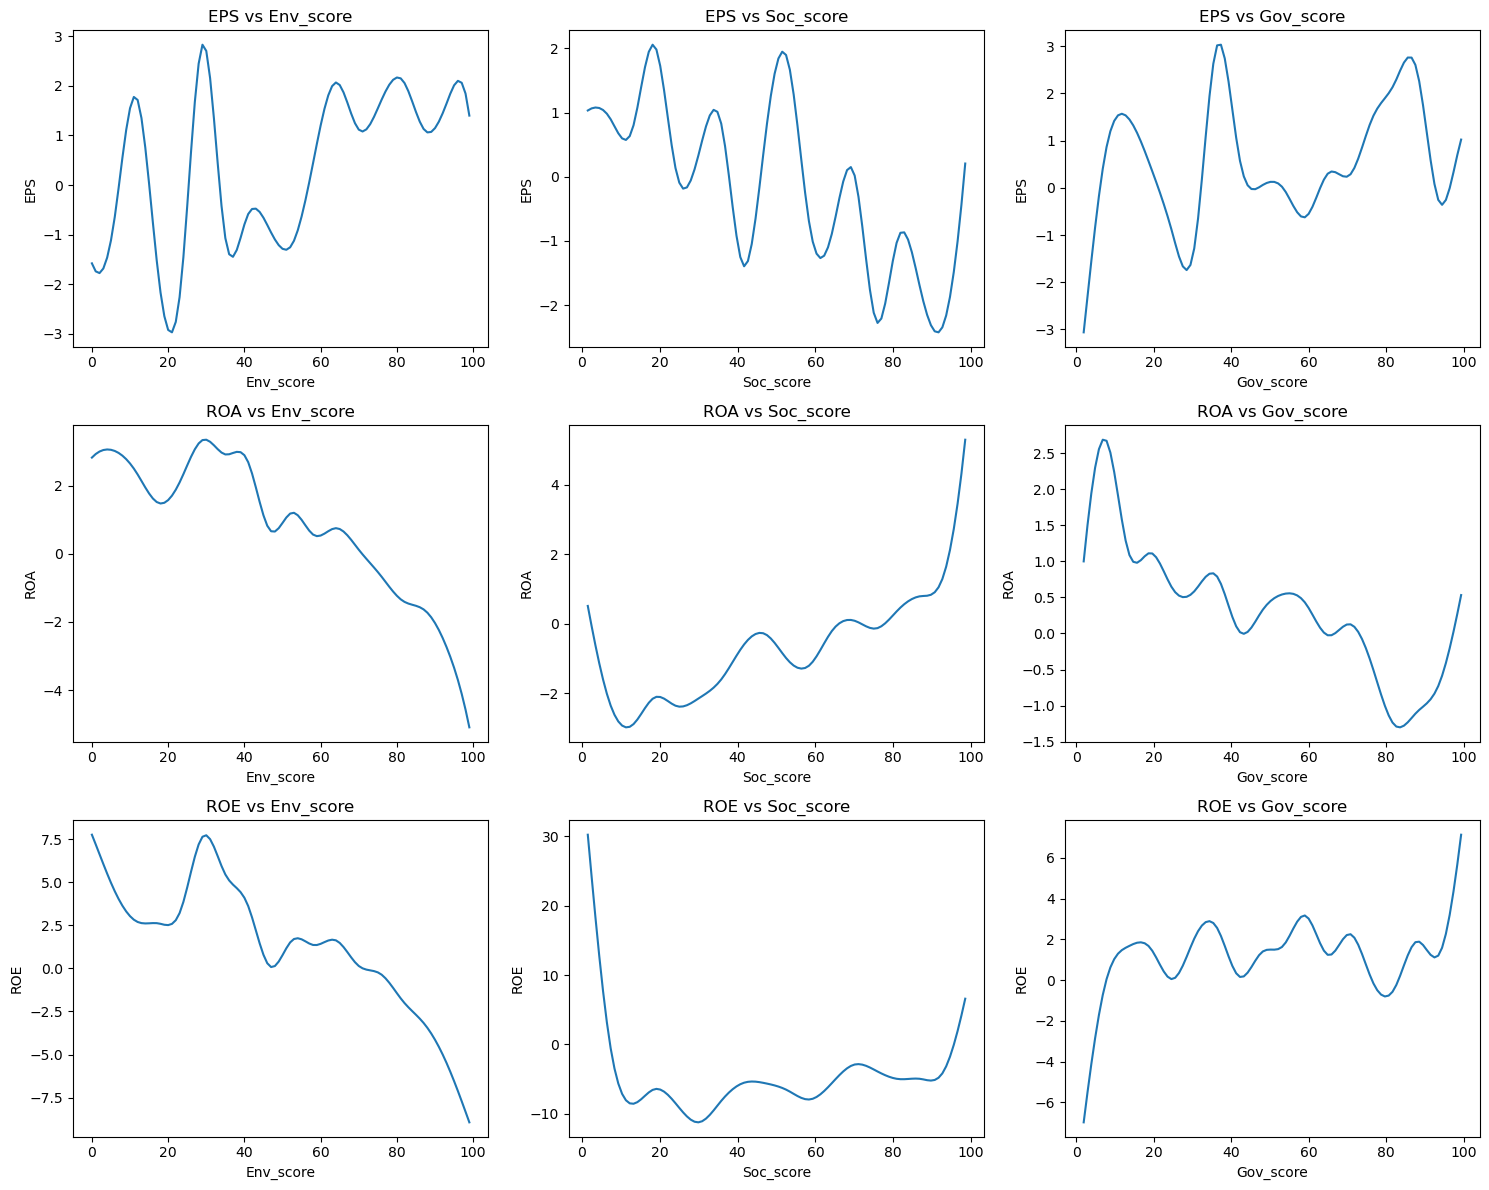

In [11]:
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Assuming df_clean and X are defined as before

# Clean your data
df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'EPS', 'ROA', 'ROE'])
X = df_clean[['Env_score', 'Soc_score', 'Gov_score']].values


results = {}
targets = ['EPS', 'ROA', 'ROE']
features = ['Env_score', 'Soc_score', 'Gov_score']

plt.figure(figsize=(15, 12))  # Make it big enough for all plots

for row_idx, target in enumerate(targets):
    y = df_clean[target].values
    
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)
    results[target] = gam
    
    for col_idx, feature in enumerate(features):
        plt.subplot(len(targets), len(features), row_idx * len(features) + col_idx + 1)
        XX = gam.generate_X_grid(term=col_idx)
        pdp = gam.partial_dependence(term=col_idx, X=XX)
        plt.plot(XX[:, col_idx], pdp)
        plt.title(f'{target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)

plt.tight_layout()
# plt.savefig('GAM_all_targets_ESG.pdf')
plt.show()



In [37]:
import numpy as np
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Clean your data
df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'EPS', 'ROA', 'ROE'])
X = df_clean[['Env_score', 'Soc_score', 'Gov_score']].values

# Store polynomial coefficients
polynomials = {}

# Loop over each financial ratio
for target in ['EPS', 'ROA', 'ROE']:
    y = df_clean[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    feature_names = ['Env_score', 'Soc_score', 'Gov_score']
    poly_dict = {}

    for i, feature in enumerate(feature_names):
        grid = gam.generate_X_grid(term=i)
        f_vals = gam.partial_dependence(term=i, X=grid).flatten()
        x_vals = grid[:, i]

        # Fit a degree-3 polynomial (cubic) to the smooth function
        p = Polynomial.fit(x_vals, f_vals, deg=3)
        poly_dict[feature] = p.convert().coef  # Convert to power basis (standard polynomial form)

    polynomials[target] = poly_dict


In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create a DataFrame to store the results
evaluation_df = pd.DataFrame(columns=['Target', 'R2 Score', 'MSE', 'MAE'])

# Evaluate each model
for target in targets:
    y_true = df_clean[target].values
    y_pred = results[target].predict(X)
    
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    
    evaluation_df = pd.concat([
        evaluation_df,
        pd.DataFrame({
            'Target': [target],
            'R2 Score': [r2],
            'MSE': [mse],
            'MAE': [mae]
        })
    ], ignore_index=True)

# Display evaluation results
print(evaluation_df)

  Target  R2 Score         MSE       MAE
0    EPS  0.007412  476.440925  4.696967
1    ROA  0.096033   29.253513  3.798841
2    ROE  0.035128  394.369604  9.962704


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_26896\3278948464.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_df = pd.concat([


In [13]:
polynomials['ROE']

{'Env_score': array([ 5.29237799e+00, -8.64936247e-02,  1.87422759e-03, -2.37005481e-05]),
 'Soc_score': array([ 1.40011064e+01, -1.51852886e+00,  2.92142653e-02, -1.59193881e-04]),
 'Gov_score': array([-4.18415738e+00,  4.28929832e-01, -8.98677130e-03,  5.52887251e-05])}

In [15]:
polynomials['ROA']

{'Env_score': array([ 2.74992922e+00, -9.99347566e-03,  5.60943788e-05, -6.62882079e-06]),
 'Soc_score': array([-1.87849941e+00, -9.49571221e-03,  3.37315305e-04,  2.27428213e-06]),
 'Gov_score': array([ 2.12596587e+00, -5.25897387e-02,  3.16535873e-04, -7.55258680e-07])}

In [17]:
polynomials['EPS']

{'Env_score': array([-3.80276237e-01, -3.28762043e-02,  1.20416249e-03, -6.38824394e-06]),
 'Soc_score': array([ 8.88668177e-01,  1.96036475e-02, -1.04516771e-03,  5.86636852e-06]),
 'Gov_score': array([-2.04222846e-01,  2.32195019e-02, -2.73259416e-04,  1.90896677e-06])}

R² Score: -1.0255
Mean Absolute Error (MAE): 21.4402
Root Mean Squared Error (RMSE): 28.7727


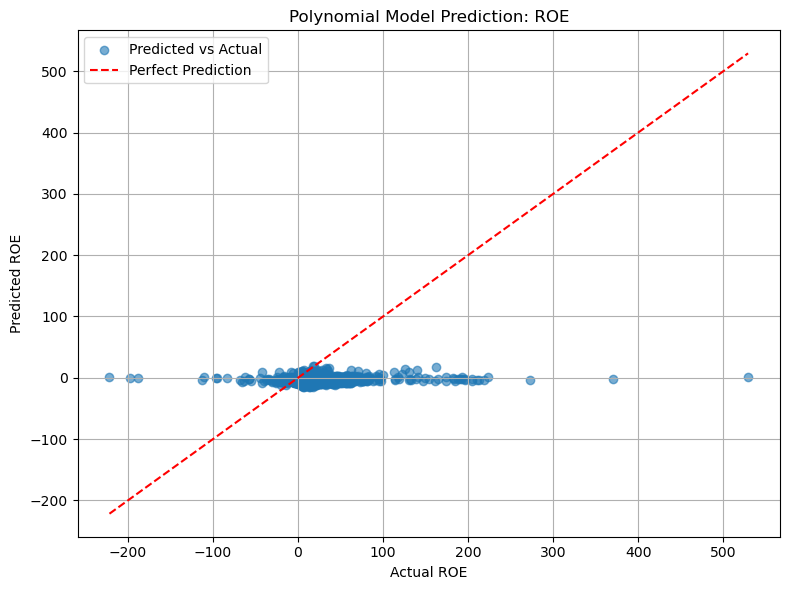

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assume your dataframe is named df and contains these columns
# df = pd.read_csv(...) or already loaded

# Define the polynomial functions
def poly_env(x):
    return 5.2924 - 0.0865 * x + 0.001874 * x**2 - 0.0000237 * x**3

def poly_soc(x):
    return 14.0011 - 1.5185 * x + 0.02921 * x**2 - 0.0001592 * x**3

def poly_gov(x):
    return -4.1842 + 0.4289 * x - 0.008987 * x**2 + 0.00005529 * x**3

# Predict the financial ratio (example: ROE)
df = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'ROE'])  # drop missing rows
predicted_roe = (
    poly_env(df['Env_score'].values) +
    poly_soc(df['Soc_score'].values) +
    poly_gov(df['Gov_score'].values)
)

# True values
actual_roe = df['ROE'].values

# Evaluation metrics
r2 = r2_score(actual_roe, predicted_roe)
mae = mean_absolute_error(actual_roe, predicted_roe)
rmse = np.sqrt(mean_squared_error(actual_roe, predicted_roe))

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Optional: Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_roe, predicted_roe, alpha=0.6, label='Predicted vs Actual')
plt.plot([actual_roe.min(), actual_roe.max()],
         [actual_roe.min(), actual_roe.max()],
         'r--', label='Perfect Prediction')
plt.xlabel('Actual ROE')
plt.ylabel('Predicted ROE')
plt.title('Polynomial Model Prediction: ROE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Evaluation for ROA:
R² Score: -1.1259
Mean Absolute Error (MAE): 6.3877
Root Mean Squared Error (RMSE): 8.2943



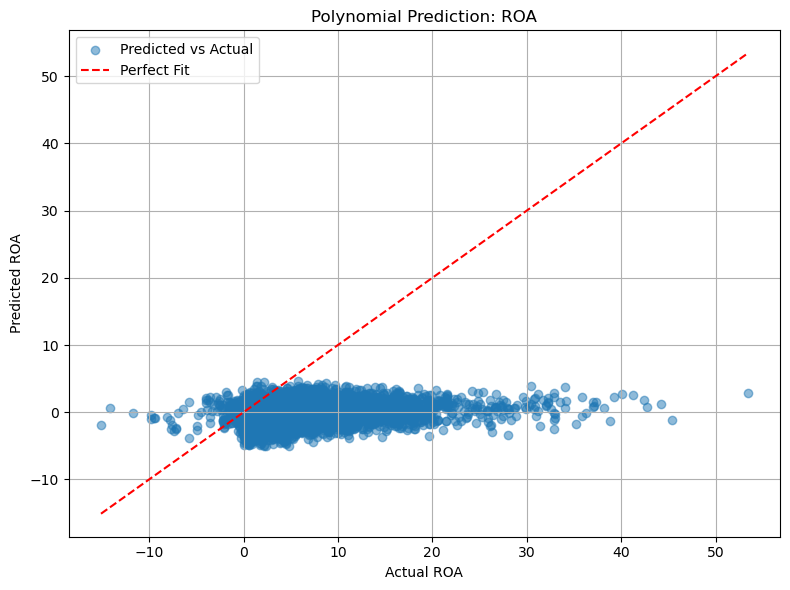

🔍 Evaluation for EPS:
R² Score: -0.0194
Mean Absolute Error (MAE): 3.9316
Root Mean Squared Error (RMSE): 22.1205



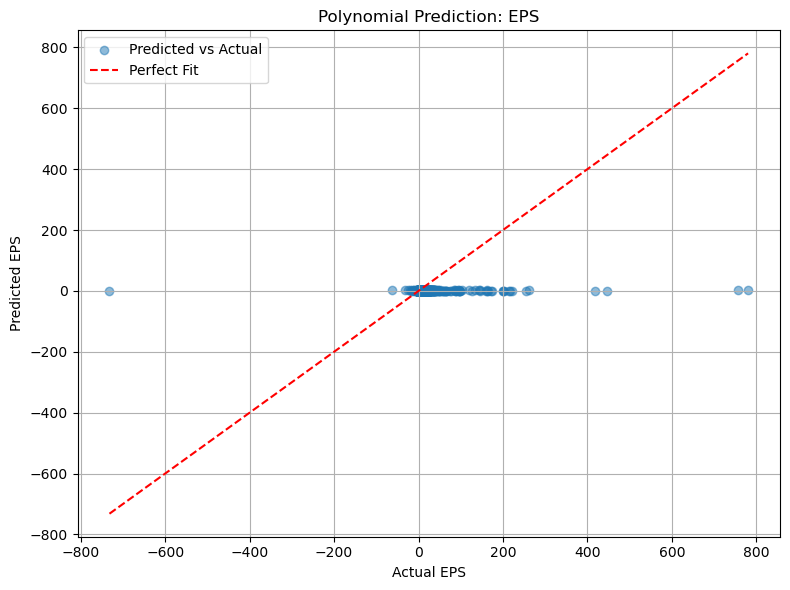

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Define your cubic polynomial functions using coefficients

# ROA coefficients
ROA_coeffs = {
    'Env_score': [2.74992922, -0.00999348, 0.00005609, -0.00000663],
    'Soc_score': [-1.87849941, -0.00949571, 0.00033732, 0.00000227],
    'Gov_score': [2.12596587, -0.05258974, 0.00031654, -0.00000076]
}

# EPS coefficients
EPS_coeffs = {
    'Env_score': [-0.38027624, -0.03287620, 0.00120416, -0.00000639],
    'Soc_score': [0.88866818, 0.01960365, -0.00104517, 0.00000587],
    'Gov_score': [-0.20422285, 0.02321950, -0.00027326, 0.00000191]
}

# Polynomial evaluation function
def evaluate_poly(x, coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Prediction function for a financial ratio
def predict(df, coeffs_dict):
    return (
        evaluate_poly(df['Env_score'].values, coeffs_dict['Env_score']) +
        evaluate_poly(df['Soc_score'].values, coeffs_dict['Soc_score']) +
        evaluate_poly(df['Gov_score'].values, coeffs_dict['Gov_score'])
    )

# Evaluation function
def evaluate_model(df, target_col, coeffs_dict, title):
    df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', target_col])
    y_true = df_clean[target_col].values
    y_pred = predict(df_clean, coeffs_dict)

    # Metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"🔍 Evaluation for {title}:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted vs Actual')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Perfect Fit')
    plt.xlabel(f'Actual {title}')
    plt.ylabel(f'Predicted {title}')
    plt.title(f'Polynomial Prediction: {title}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load or assume df is already in memory
# df = pd.read_csv("your_data.csv")

# Evaluate for ROA
evaluate_model(df, target_col='ROA', coeffs_dict=ROA_coeffs, title='ROA')

# Evaluate for EPS
evaluate_model(df, target_col='EPS', coeffs_dict=EPS_coeffs, title='EPS')


# ESG as target

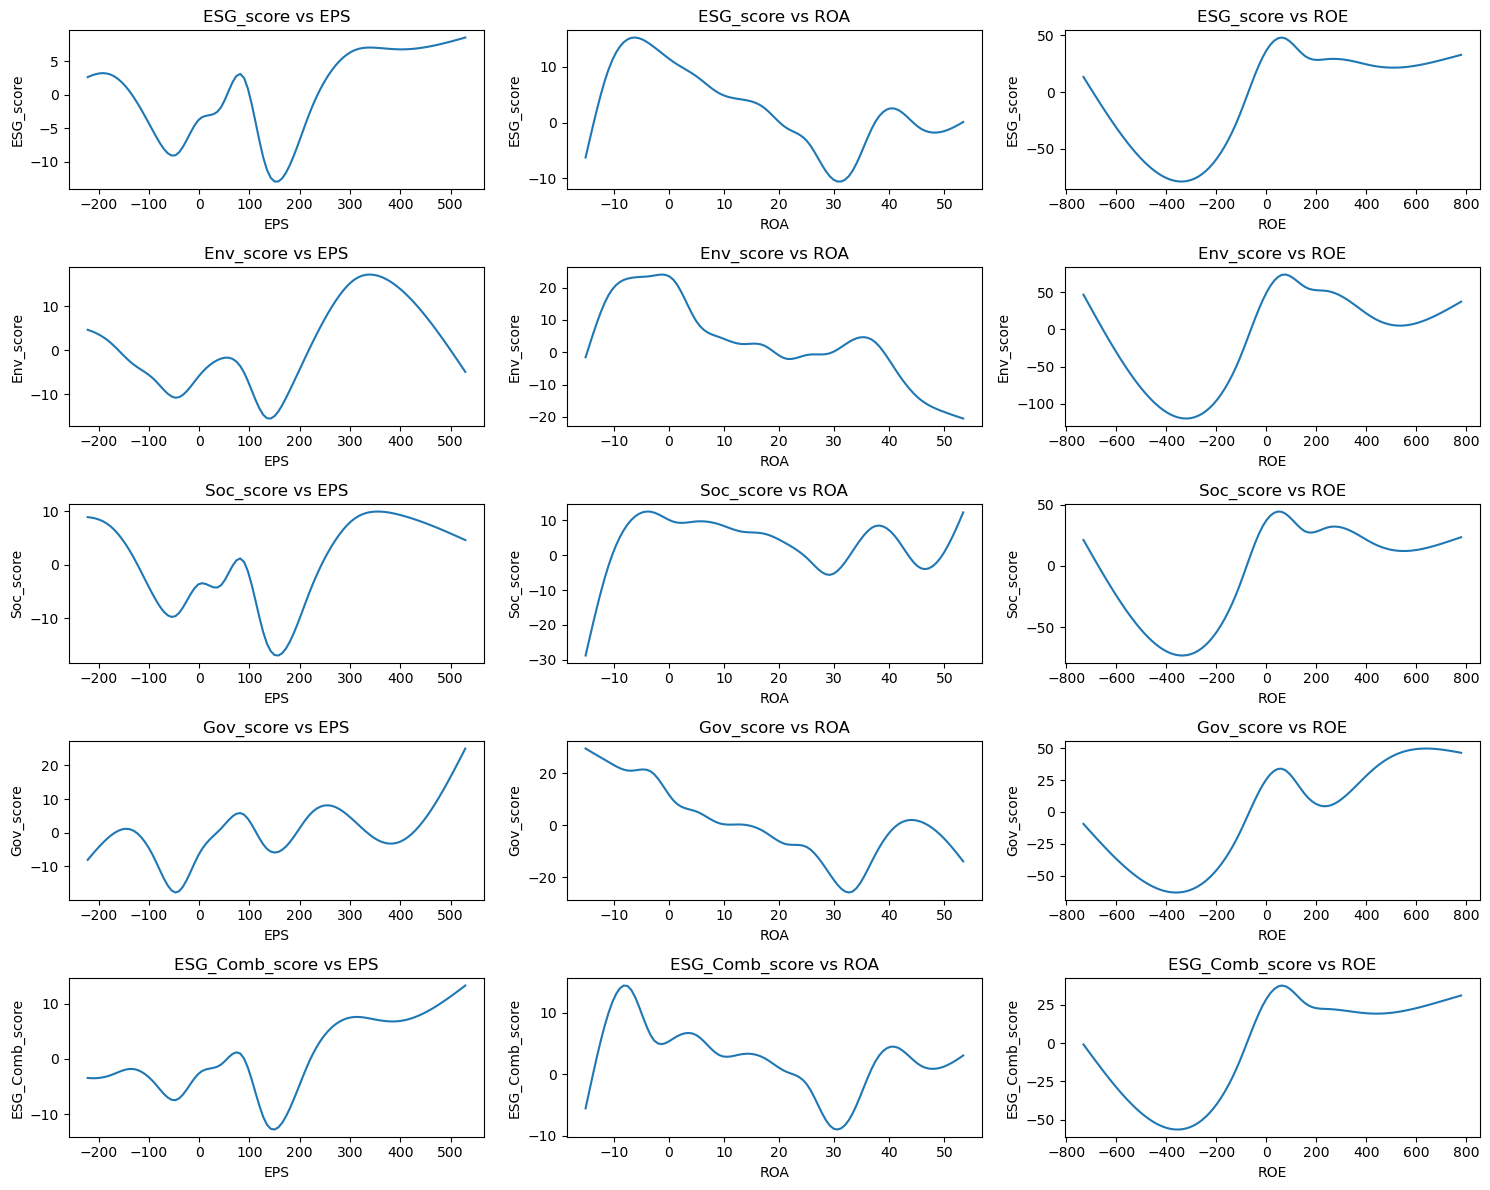

In [29]:
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Assuming df_clean and X are defined as before

df_clean = df.dropna(subset=['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'EPS', 'ROA', 'ROE'])
X = df_clean[['ROE', 'ROA', 'EPS']].values

results = {}
features = ['EPS', 'ROA', 'ROE']
targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

plt.figure(figsize=(15, 12))  # Make it big enough for all plots

for row_idx, target in enumerate(targets):
    y = df_clean[target].values
    
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)
    results[target] = gam
    
    for col_idx, feature in enumerate(features):
        plt.subplot(len(targets), len(features), row_idx * len(features) + col_idx + 1)
        XX = gam.generate_X_grid(term=col_idx)
        pdp = gam.partial_dependence(term=col_idx, X=XX)
        plt.plot(XX[:, col_idx], pdp)
        plt.title(f'{target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)

plt.tight_layout()
plt.savefig('GAM_all_ESG_EU.pdf')
plt.show()


In [37]:
import numpy as np
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Clean your data
df_clean = df.dropna(subset=['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'EPS', 'ROA', 'ROE'])
X = df_clean[['EPS', 'ROA', 'ROE']].values

# Store polynomial coefficients
polynomials = {}

# Loop over each financial ratio
for target in ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']:
    y = df_clean[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    feature_names = ['EPS', 'ROA', 'ROE']
    poly_dict = {}

    for i, feature in enumerate(feature_names):
        grid = gam.generate_X_grid(term=i)
        f_vals = gam.partial_dependence(term=i, X=grid).flatten()
        x_vals = grid[:, i]

        # Fit a degree-3 polynomial (cubic) to the smooth function
        p = Polynomial.fit(x_vals, f_vals, deg=3)
        poly_dict[feature] = p.convert().coef  # Convert to power basis (standard polynomial form)

    polynomials[target] = poly_dict

In [41]:
# gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)
# print(gam.lam)


[[0.6], [0.6], [0.6]]


In [39]:
polynomials['ESG_score']

{'EPS': array([-9.05175794e+00,  1.77653297e-01,  2.42936601e-05, -3.18549751e-07]),
 'ROA': array([ 1.04911415e+01, -1.50003615e-01, -2.79253798e-02,  5.44740084e-04]),
 'ROE': array([-5.98296767e+00, -4.46566126e-03,  1.78168690e-04, -2.21170143e-07])}

In [19]:
polynomials['Env_score']

{'EPS': array([-1.75712468e+01,  2.59437882e-01,  4.36204209e-05, -5.31655924e-07]),
 'ROA': array([ 1.39314745e+01, -3.31198307e-01, -6.31293647e-03,  2.38160063e-05]),
 'ROE': array([-1.05099648e+01,  1.89354814e-02,  3.75743720e-04, -7.19138728e-07])}

In [21]:
polynomials['Soc_score']

{'EPS': array([-7.35459748e+00,  1.64084752e-01,  1.81177691e-05, -3.16966408e-07]),
 'ROA': array([ 9.30093313e+00,  5.71363376e-01, -5.40352613e-02,  8.18341910e-04]),
 'ROE': array([-8.22188895e+00, -1.38118394e-02,  2.98907624e-04, -4.15015999e-07])}

In [23]:
polynomials['Gov_score']

{'EPS': array([-1.08375391e+01,  1.40839117e-01,  4.10819746e-05, -1.84757694e-07]),
 'ROA': array([ 1.21935540e+01, -1.19721094e+00,  6.15783028e-03,  2.30875004e-04]),
 'ROE': array([-3.40717935e+00,  7.45708786e-03,  4.34137691e-06,  8.38492791e-08])}

In [25]:
polynomials['ESG_Comb_score']

{'EPS': array([-4.15257282e+00,  1.27642315e-01,  9.15117095e-06, -2.04444621e-07]),
 'ROA': array([ 7.23730228e+00, -1.75453902e-01, -1.53423147e-02,  3.46892233e-04]),
 'ROE': array([-5.14464140e+00,  5.44005635e-03,  9.65878951e-05, -7.93679600e-08])}

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create a DataFrame to store the results
evaluation_df = pd.DataFrame(columns=['Target', 'R2 Score', 'MSE', 'MAE'])

# Evaluate each model
for target in targets:
    y_true = df_clean[target].values
    y_pred = results[target].predict(X)
    
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    
    evaluation_df = pd.concat([
        evaluation_df,
        pd.DataFrame({
            'Target': [target],
            'R2 Score': [r2],
            'MSE': [mse],
            'MAE': [mae]
        })
    ], ignore_index=True)

# Display evaluation results
print(evaluation_df)


           Target  R2 Score         MSE        MAE
0       ESG_score -0.044313  351.752223  14.501583
1       Env_score -0.041443  596.285945  18.501564
2       Soc_score -0.032150  466.713131  17.205157
3       Gov_score  0.013250  456.470284  17.685901
4  ESG_Comb_score -0.024073  309.554214  14.047012


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_29040\1936236520.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_df = pd.concat([


# Financial ratios as dependent and try with interaction terms

In [36]:
import pandas as pd
from pygam import LinearGAM, s, f, te

# Prepare your dataframe, e.g., df

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'ROE', 
                             'Market Capitalization Category', 'NAICS National Industry Name', 'Country of Exchange'])

# Encode categorical variables as categorical dtype
df_clean['MarketCapCat'] = df_clean['Market Capitalization Category'].astype('category')
df_clean['Industry'] = df_clean['NAICS National Industry Name'].astype('category')
df_clean['Country'] = df_clean['Country of Exchange'].astype('category')

# For pyGAM, convert categorical to integer codes (indexes)
df_clean['MarketCapCat_code'] = df_clean['MarketCapCat'].cat.codes
df_clean['Industry_code'] = df_clean['Industry'].cat.codes
df_clean['Country_code'] = df_clean['Country'].cat.codes

# Define features matrix X and target y (example: ROE)
X = df_clean[['Env_score', 'Soc_score', 'Gov_score', 'MarketCapCat_code', 'Industry_code', 'Country_code']]
y = df_clean['ROE']

# Specify the GAM formula:
# s(): smooth term for continuous variables
# f(): factor (categorical) terms for categorical variables
# te(): tensor product smooth for interactions (continuous-continuous or continuous-factor)
# For interactions among categorical variables, pyGAM uses factor-by-factor terms

# Example GAM model with:
# - smooth terms for Env, Soc, Gov scores
# - factor terms for MarketCapCat, Industry, Country
# - tensor product interaction between MarketCapCat and Industry and Country (factor interactions)

gam = LinearGAM(
    s(0) + s(1) + s(2) +    # smooth for Env_score, Soc_score, Gov_score
    f(3) + f(4) + f(5) +    # factors for MarketCapCat, Industry, Country
    te(3,4) + te(3,5) + te(4,5)  # interaction smooths between categorical variables
).fit(X.values, y.values)

# Print summary
print(gam.summary())

# Predict
y_pred = gam.predict(X)

# Evaluate with R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(f"GAM with interactions R2: {r2:.4f}")


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    294.5416
Link Function:                     IdentityLink Log Likelihood:                                -41768.6877
Number of Samples:                         6296 AIC:                                            84128.4585
                                                AICc:                                           84157.6746
                                                GCV:                                              330.7015
                                                Scale:                                            302.9752
                                                Pseudo R-Squared:                                   0.2934
Feature Function                  Lam

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_28100\2322899350.py:42: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [26]:
import pandas as pd
from pygam import LinearGAM, s, f, te

# Prepare your dataframe, e.g., df

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'ROE', 
                             'Market Capitalization Category', 'NAICS National Industry Name', 'Country of Exchange'])

# Encode categorical variables as categorical dtype
df_clean['MarketCapCat'] = df_clean['Market Capitalization Category'].astype('category')
df_clean['Industry'] = df_clean['NAICS National Industry Name'].astype('category')
df_clean['Country'] = df_clean['Country of Exchange'].astype('category')

# For pyGAM, convert categorical to integer codes (indexes)
df_clean['MarketCapCat_code'] = df_clean['MarketCapCat'].cat.codes
df_clean['Industry_code'] = df_clean['Industry'].cat.codes
df_clean['Country_code'] = df_clean['Country'].cat.codes

# Define features matrix X and target y (example: ROE)
X = df_clean[['Env_score', 'Soc_score', 'Gov_score', 'MarketCapCat_code', 'Industry_code', 'Country_code']]
y = df_clean['ROA']

# Specify the GAM formula:
# s(): smooth term for continuous variables
# f(): factor (categorical) terms for categorical variables
# te(): tensor product smooth for interactions (continuous-continuous or continuous-factor)
# For interactions among categorical variables, pyGAM uses factor-by-factor terms

# Example GAM model with:
# - smooth terms for Env, Soc, Gov scores
# - factor terms for MarketCapCat, Industry, Country
# - tensor product interaction between MarketCapCat and Industry and Country (factor interactions)

gam = LinearGAM(
    s(0) + s(1) + s(2) +    # smooth for Env_score, Soc_score, Gov_score
    f(3) + f(4) + f(5) +    # factors for MarketCapCat, Industry, Country
    te(3,4) + te(3,5) + te(4,5)  # interaction smooths between categorical variables
).fit(X.values, y.values)

# Print summary
print(gam.summary())

# Predict
y_pred = gam.predict(X)

# Evaluate with R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(f"GAM with interactions R2: {r2:.4f}")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    294.5416
Link Function:                     IdentityLink Log Likelihood:                                -22593.2327
Number of Samples:                         6296 AIC:                                            45777.5485
                                                AICc:                                           45806.7646
                                                GCV:                                               15.2254
                                                Scale:                                             13.9489
                                                Pseudo R-Squared:                                   0.5891
Feature Function                  Lam

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_28100\1331657105.py:42: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [28]:
import pandas as pd
from pygam import LinearGAM, s, f, te

# Prepare your dataframe, e.g., df

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'ROE', 
                             'Market Capitalization Category', 'NAICS National Industry Name', 'Country of Exchange'])

# Encode categorical variables as categorical dtype
df_clean['MarketCapCat'] = df_clean['Market Capitalization Category'].astype('category')
df_clean['Industry'] = df_clean['NAICS National Industry Name'].astype('category')
df_clean['Country'] = df_clean['Country of Exchange'].astype('category')

# For pyGAM, convert categorical to integer codes (indexes)
df_clean['MarketCapCat_code'] = df_clean['MarketCapCat'].cat.codes
df_clean['Industry_code'] = df_clean['Industry'].cat.codes
df_clean['Country_code'] = df_clean['Country'].cat.codes

# Define features matrix X and target y (example: ROE)
X = df_clean[['Env_score', 'Soc_score', 'Gov_score', 'MarketCapCat_code', 'Industry_code', 'Country_code']]
y = df_clean['EPS']

# Specify the GAM formula:
# s(): smooth term for continuous variables
# f(): factor (categorical) terms for categorical variables
# te(): tensor product smooth for interactions (continuous-continuous or continuous-factor)
# For interactions among categorical variables, pyGAM uses factor-by-factor terms

# Example GAM model with:
# - smooth terms for Env, Soc, Gov scores
# - factor terms for MarketCapCat, Industry, Country
# - tensor product interaction between MarketCapCat and Industry and Country (factor interactions)

gam = LinearGAM(
    s(0) + s(1) + s(2) +    # smooth for Env_score, Soc_score, Gov_score
    f(3) + f(4) + f(5) +    # factors for MarketCapCat, Industry, Country
    te(3,4) + te(3,5) + te(4,5)  # interaction smooths between categorical variables
).fit(X.values, y.values)

# Print summary
print(gam.summary())

# Predict
y_pred = gam.predict(X)

# Evaluate with R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(f"GAM with interactions R2: {r2:.4f}")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    294.5416
Link Function:                     IdentityLink Log Likelihood:                                -43598.9953
Number of Samples:                         6296 AIC:                                            87789.0737
                                                AICc:                                           87818.2898
                                                GCV:                                               442.448
                                                Scale:                                            405.3528
                                                Pseudo R-Squared:                                    0.195
Feature Function                  Lam

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_28100\3013153829.py:42: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())
